In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as skl_lm
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import LeaveOneOut, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, precision_score, recall_score 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib_venn import venn2
from sklearn import datasets

from sklearn.ensemble import RandomForestClassifier as rfc

from tqdm import tqdm

from adjustText import adjust_text

from packages.utils import standard_OHE

import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical




In [2]:
# Importazione dataset

data = pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [3]:
for i in list(data.columns):
    print(i)




Bankrupt?
 ROA(C) before interest and depreciation before interest
 ROA(A) before interest and % after tax
 ROA(B) before interest and depreciation after tax
 Operating Gross Margin
 Realized Sales Gross Margin
 Operating Profit Rate
 Pre-tax net Interest Rate
 After-tax net Interest Rate
 Non-industry income and expenditure/revenue
 Continuous interest rate (after tax)
 Operating Expense Rate
 Research and development expense rate
 Cash flow rate
 Interest-bearing debt interest rate
 Tax rate (A)
 Net Value Per Share (B)
 Net Value Per Share (A)
 Net Value Per Share (C)
 Persistent EPS in the Last Four Seasons
 Cash Flow Per Share
 Revenue Per Share (Yuan ¥)
 Operating Profit Per Share (Yuan ¥)
 Per Share Net profit before tax (Yuan ¥)
 Realized Sales Gross Profit Growth Rate
 Operating Profit Growth Rate
 After-tax Net Profit Growth Rate
 Regular Net Profit Growth Rate
 Continuous Net Profit Growth Rate
 Total Asset Growth Rate
 Net Value Growth Rate
 Total Asset Return Growth Rate R

In [4]:
#Modifica nome delle colonne
data.rename(columns={"Bankrupt?" : "Bancarotta",
                     " ROA(C) before interest and depreciation before interest" : "ROA(C) prima degli interessi e della svalutazione",
                     " ROA(A) before interest and % after tax" :"ROA(A) prima degli interessi e dopo le tasse",
                     " ROA(B) before interest and depreciation after tax" : "ROA(B) al lordo di interessi e ammortamenti dopo le imposte",
                     " Operating Gross Margin" : "Margine Lordo Operativo",
                     " Realized Sales Gross Margin" : "Margine Lordo sulle Vendite Effettive",
                     " Operating Profit Rate" : "Margine di Profitto Operativo",
                     " Pre-tax net Interest Rate" : "Aliquota di interesse netta ante imposte",
                     " After-tax net Interest Rate" : "Tasso di interesse netto dopo le tasse",
                     " Non-industry income and expenditure/revenue" : "Entrate e spese/redditività non legate all'industria",
                     " Continuous interest rate (after tax)" : "Tasso di interesse continuo (al netto delle imposte)",
                     " Operating Expense Rate" : "Tasso di Spesa Operativa",
                     " Research and development expense rate" : "Aliquota delle spese di ricerca e sviluppo",
                     " Cash flow rate" : "Tasso di flusso di cassa", 
                     " Interest-bearing debt interest rate" : "Aliquota degli interessi sul debito", 
                     " Tax rate (A)" : "Aliquota fiscale (A)", 
                     " Net Value Per Share (B)" : "Valore Netto per Azione (B)", 
                     " Net Value Per Share (A)" : "Valore Netto per Azione (A)", 
                     " Net Value Per Share (C)" : "Valore Netto per Azione (C)", 
                     " Persistent EPS in the Last Four Seasons" : "EPS persistente nelle ultime quattro stagioni", 
                     " Cash Flow Per Share" : "Flusso di cassa per azione", 
                     " Revenue Per Share (Yuan ¥)" : "Entrate per azione (Yuan ¥)", 
                     " Operating Profit Per Share (Yuan ¥)" : "Profitto Operativo per Azione (Yuan ¥)",
                     " Per Share Net profit before tax (Yuan ¥)" : "Profitto netto per azione prima delle tasse (Yuan ¥)", 
                     " Realized Sales Gross Profit Growth Rate" : "Tasso di crescita del margine lordo delle vendite", 
                     " Operating Profit Growth Rate" : "Tasso di crescita dell'utile operativo", 
                     " After-tax Net Profit Growth Rate" : "Tasso di crescita del profitto netto dopo le tasse", 
                     " Regular Net Profit Growth Rate" : "Aliquota crescita regolare del profitto netto", 
                     " Continuous Net Profit Growth Rate" : "Tasso di crescita continua del profitto netto", 
                     " Total Asset Growth Rate" : "Tasso di crescita totale degli asset", 
                     " Net Value Growth Rate" : "Tasso crescita valore netto",
                     " Total Asset Return Growth Rate Ratio" : "Tasso di crescita del rendimento totale degli asset ",
                     " Cash Reinvestment %" : "Percentuale di reinvestimento del contante", 
                     " Current Ratio" : "Rapporto Corrente", 
                     " Quick Ratio" : "Rapporto Rapido", 
                     " Interest Expense Ratio" : "Rapporto Spese Interesse", 
                     " Total debt/Total net worth" : "Debito totale/ Patrimonio netto totale", 
                     " Debt ratio %" : "Rapporto debito %", 
                     " Net worth/Assets" : "Patrimonio netto/Attività", 
                     " Long-term fund suitability ratio (A)" : "Livello di idoneità dei fondi a lungo termine (A)", 
                     " Borrowing dependency" : "Indebitamento da prestiti", 
                     " Contingent liabilities/Net worth" : "Crediti in sospeso/Patrimonio netto", 
                     " Operating profit/Paid-in capital" : "Profitto operativo su capitale versato", 
                     " Net profit before tax/Paid-in capital" : "Profitto netto prima delle imposte / Capitale sociale versato", 
                     " Inventory and accounts receivable/Net value" : "Inventario e crediti commerciali/Valore netto", 
                     " Total Asset Turnover" : "Rotazione totale degli asset", 
                     " Accounts Receivable Turnover" : "Rotazione dei crediti", 
                     " Average Collection Days" : "Giorni medi di incasso", 
                     " Inventory Turnover Rate (times)" : "Rotazione dell'inventario (volte)", 
                     " Fixed Assets Turnover Frequency" : "Frequenza del turnover degli asset fissi", 
                     " Net Worth Turnover Rate (times)" :  "Net Worth Turnover Rate (times)", 
                     " Revenue per person" : "Entrate per persona", 
                     " Operating profit per person" : "Profitto operativo per persona", 
                     " Allocation rate per person" : "Tariffa di allocazione per persona", 
                     " Working Capital to Total Assets" : "Capitale circolante su attivo totale", 
                     " Quick Assets/Total Assets" : "Attività rapide/Attività totali", 
                     " Current Assets/Total Assets" : "Attività correnti/Attività totali", 
                     " Cash/Total Assets" : "Cassa/Attività Totali", 
                     " Quick Assets/Current Liability" : "Attività rapide su passività corrente", 
                     " Cash/Current Liability" : "Cassa/Passività correnti", 
                     " Current Liability to Assets" : "Passività correnti su attività", 
                     " Operating Funds to Liability" : "Rapporto tra Fondi Operativi e Passività", 
                     " Inventory/Working Capital" : "Inventario/Capitale circolante", 
                     " Inventory/Current Liability" : "Inventario/Passività corrente", 
                     " Current Liabilities/Liability" : "Correnti Passività/Passivo", 
                     " Working Capital/Equity" : "Capitale circolante/patrimonio netto", 
                     " Current Liabilities/Equity" : "Passività correnti su patrimonio netto", 
                     " Long-term Liability to Current Assets" : "Debito a lungo termine su attività correnti", 
                     " Retained Earnings to Total Assets" : "Riserve utili su attivo totale", 
                     " Total income/Total expense" : "Reddito totale/Spese totali", 
                     " Total expense/Assets" : "Spese totali/Attività", 
                     " Current Asset Turnover Rate" : "Indice di Rotazione dell'Attivo Corrente", 
                     " Quick Asset Turnover Rate" : "Velocità di rotazione rapida degli asset", 
                     " Working capitcal Turnover Rate" : "Rapporto di rotazione del capitale circolante", 
                     " Cash Turnover Rate" : "Velocità di Rotazione del Contante", 
                     " Cash Flow to Sales" : "Flusso di cassa su vendite", 
                     " Fixed Assets to Assets" : "Attivi fissi su attivi", 
                     " Current Liability to Liability" : "Rapporto attuale di passività", 
                     " Current Liability to Equity" : "Passività corrente su patrimonio netto", 
                     " Equity to Long-term Liability" : "Rap. Patrimonio a Passività a Lungo Term.", 
                     " Cash Flow to Total Assets" : "Cash Flow su Attività Totali",
                     " Cash Flow to Liability" : "Flusso di cassa sulle passività",
                     " CFO to Assets" : "Rapporto CFO su Attività", 
                     " Cash Flow to Equity" : "Flusso di cassa verso il patrimonio netto", 
                     " Current Liability to Current Assets" : "Rapporto Passività Correnti su Attività Correnti", 
                     " Liability-Assets Flag" : "Indicatore Passività-Attività", 
                     " Net Income to Total Assets" : "Redditività sull'Attivo Totale (NITA)", 
                     " Total assets to GNP price" : "Totale attività rispetto al prezzo PNL", 
                     " No-credit Interval" : "Intervallo senza credito", 
                     " Gross Profit to Sales" : "Utile lordo sulle vendite",
                     " Net Income to Stockholder's Equity" : "Utile netto/patrimonio netto", 
                     " Liability to Equity" : "Responsabilità verso il patrimonio netto", 
                     " Degree of Financial Leverage (DFL)" : "Grado di leva finanziaria (DFL)", 
                     " Interest Coverage Ratio (Interest expense to EBIT)" : "Rapp. di copertura degli interessi (interessi passivi/EBIT)", 
                     " Net Income Flag" : "Indicatore di Reddito Netto", 
                     " Equity to Liability" : "Capitale proprio/Passività"}, inplace = True)


In [5]:
for i in list(data.columns):
    print(i)


Bancarotta
ROA(C) prima degli interessi e della svalutazione
ROA(A) prima degli interessi e dopo le tasse
ROA(B) al lordo di interessi e ammortamenti dopo le imposte
Margine Lordo Operativo
Margine Lordo sulle Vendite Effettive
Margine di Profitto Operativo
Aliquota di interesse netta ante imposte
Tasso di interesse netto dopo le tasse
Entrate e spese/redditività non legate all'industria
Tasso di interesse continuo (al netto delle imposte)
Tasso di Spesa Operativa
Aliquota delle spese di ricerca e sviluppo
Tasso di flusso di cassa
Aliquota degli interessi sul debito
Aliquota fiscale (A)
Valore Netto per Azione (B)
Valore Netto per Azione (A)
Valore Netto per Azione (C)
EPS persistente nelle ultime quattro stagioni
Flusso di cassa per azione
Entrate per azione (Yuan ¥)
Profitto Operativo per Azione (Yuan ¥)
Profitto netto per azione prima delle tasse (Yuan ¥)
Tasso di crescita del margine lordo delle vendite
Tasso di crescita dell'utile operativo
Tasso di crescita del profitto netto dop

In [6]:
manual_selected_features = [
    
    'ROA(B) al lordo di interessi e ammortamenti dopo le imposte',
    'Margine Lordo Operativo',
    'Tasso di interesse netto dopo le tasse',
    'Tasso di Spesa Operativa',
    'Aliquota delle spese di ricerca e sviluppo',
    'Tasso di flusso di cassa',
    'Aliquota degli interessi sul debito',
    'Aliquota fiscale (A)',
    'Valore Netto per Azione (A)',
    'EPS persistente nelle ultime quattro stagioni',
    'Flusso di cassa per azione',
    "Tasso di crescita dell'utile operativo",
    "Tasso crescita valore netto",
    "Percentuale di reinvestimento del contante",
    "Debito totale/ Patrimonio netto totale",
    "Rapporto debito %",
    "Patrimonio netto/Attività",
    "Livello di idoneità dei fondi a lungo termine (A)",
    "Indebitamento da prestiti",
    "Crediti in sospeso/Patrimonio netto",
    "Profitto operativo su capitale versato",
    "Inventario e crediti commerciali/Valore netto",
    "Rotazione totale degli asset",
    "Profitto operativo per persona",
    "Passività correnti su attività",
    "Correnti Passività/Passivo",
    "Capitale circolante/patrimonio netto",
    "Debito a lungo termine su attività correnti",
    "Riserve utili su attivo totale",
    "Indice di Rotazione dell'Attivo Corrente",
    "Passività corrente su patrimonio netto",
    "Redditività sull'Attivo Totale (NITA)",
    "Grado di leva finanziaria (DFL)",
    "Capitale proprio/Passività",
    'Bancarotta'
]


In [7]:
# Dimensione dataset
df = pd.DataFrame(data[manual_selected_features])
print("La dimensione del dataset è: ", df.shape)


La dimensione del dataset è:  (6819, 35)


In [8]:
# Valori Mancanti
missing_values_count = df.isnull().sum()
print(missing_values_count)


ROA(B) al lordo di interessi e ammortamenti dopo le imposte    0
Margine Lordo Operativo                                        0
Tasso di interesse netto dopo le tasse                         0
Tasso di Spesa Operativa                                       0
Aliquota delle spese di ricerca e sviluppo                     0
Tasso di flusso di cassa                                       0
Aliquota degli interessi sul debito                            0
Aliquota fiscale (A)                                           0
Valore Netto per Azione (A)                                    0
EPS persistente nelle ultime quattro stagioni                  0
Flusso di cassa per azione                                     0
Tasso di crescita dell'utile operativo                         0
Tasso crescita valore netto                                    0
Percentuale di reinvestimento del contante                     0
Debito totale/ Patrimonio netto totale                         0
Rapporto debito %        

In [9]:
# Valori Duplicati
Duplicates = df.duplicated().sum()
print("Numero di duplicati: ", Duplicates)


Numero di duplicati:  0


In [10]:
# Tipologia dati
print(df.dtypes)


ROA(B) al lordo di interessi e ammortamenti dopo le imposte    float64
Margine Lordo Operativo                                        float64
Tasso di interesse netto dopo le tasse                         float64
Tasso di Spesa Operativa                                       float64
Aliquota delle spese di ricerca e sviluppo                     float64
Tasso di flusso di cassa                                       float64
Aliquota degli interessi sul debito                            float64
Aliquota fiscale (A)                                           float64
Valore Netto per Azione (A)                                    float64
EPS persistente nelle ultime quattro stagioni                  float64
Flusso di cassa per azione                                     float64
Tasso di crescita dell'utile operativo                         float64
Tasso crescita valore netto                                    float64
Percentuale di reinvestimento del contante                     float64
Debito

In [11]:
# variabili dummy
dummy_cols = data.columns[data.nunique() == 2]
data_dummy = data[dummy_cols]
print(data_dummy)


      Bancarotta  Indicatore Passività-Attività
0              1                              0
1              1                              0
2              1                              0
3              1                              0
4              1                              0
...          ...                            ...
6814           0                              0
6815           0                              0
6816           0                              0
6817           0                              0
6818           0                              0

[6819 rows x 2 columns]


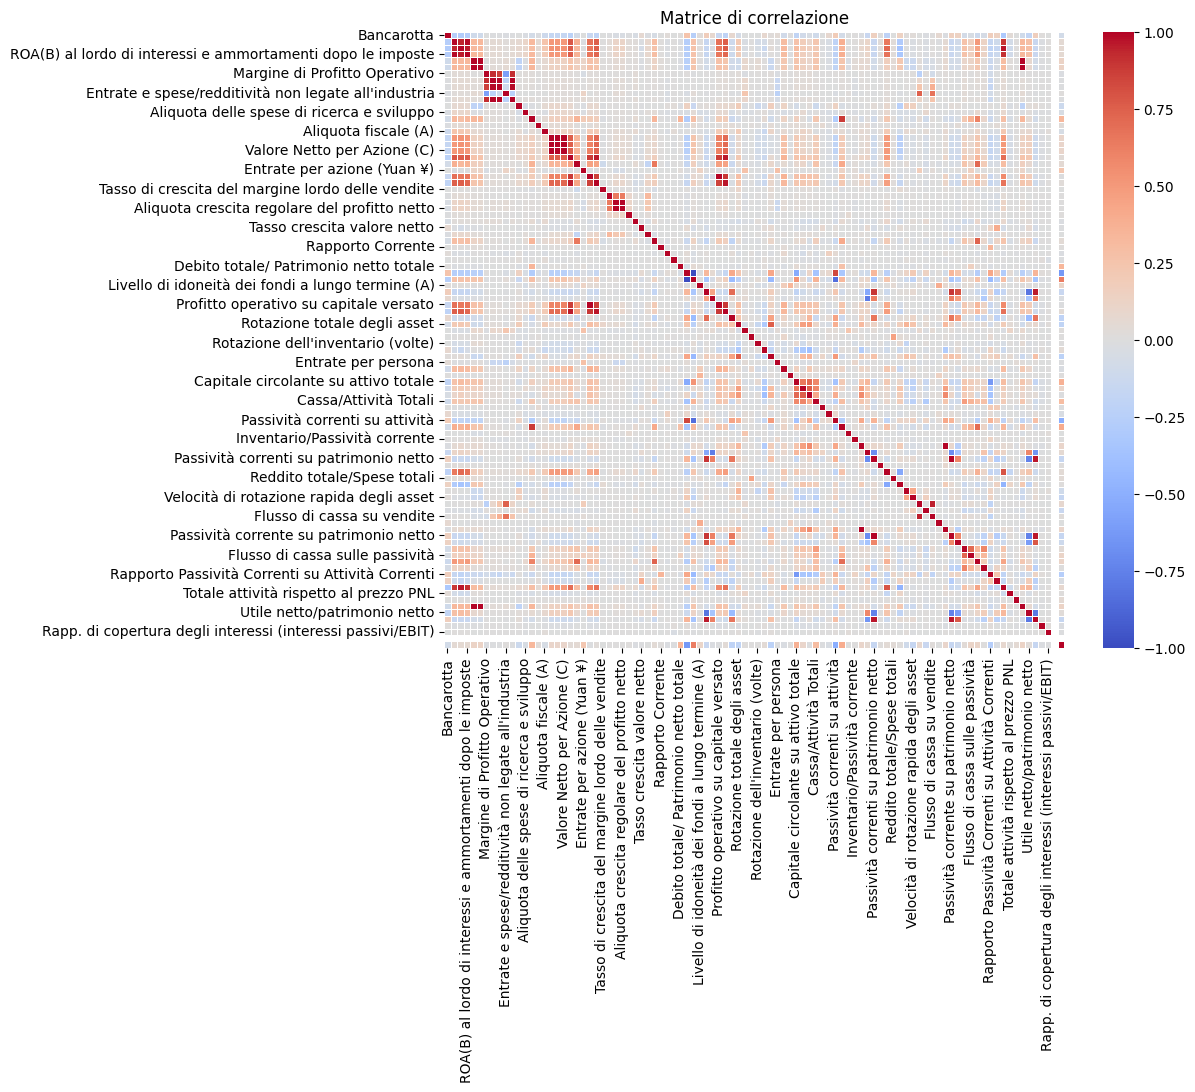

In [12]:
# Matrice di Correlazione
correlation_matrix = data.corr()
correlation_matrix

#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matrice di correlazione')
plt.show()


In [13]:
x = data.drop(['Bancarotta'],axis=1)
y = data['Bancarotta']

In [14]:
numeric_columns = x.select_dtypes(include=[np.number]).columns.tolist()
X_num = x[numeric_columns]

# Rimozione colonne binarie e normalizzazione

num_not_dummy_cols = X_num.columns[X_num.nunique() > 2]
X_num = X_num[num_not_dummy_cols]
normalized_df=(X_num-X_num.min())/(X_num.max()-X_num.min())
normalized_df.head()

ROA(C) prima degli interessi e della svalutazione  \
0                                              0.371   
1                                              0.464   
2                                              0.426   
3                                              0.400   
4                                              0.465   

   ROA(A) prima degli interessi e dopo le tasse  \
0                                         0.424   
1                                         0.538   
2                                         0.499   
3                                         0.451   
4                                         0.538   

   ROA(B) al lordo di interessi e ammortamenti dopo le imposte  \
0                                              0.406             
1                                              0.517             
2                                              0.472             
3                                              0.458             
4                                              0.522             

   Margine Lordo Operativo  Margine Lordo sulle Vendite Effettive  \
0                    0.601                                  0.601   
1                    0.610                                  0.610   
2                    0.601                                  0.601   
3                    0.584                                  0.584   
4                    0.599                                  0.599   

   Margine di Profitto Operativo  Aliquota di interesse netta ante imposte  \
0                          0.999                                     0.797   
1                          0.999                                     0.797   
2                          0.999                                     0.796   
3                          0.999                                     0.797   
4                          0.999                                     0.797   

   Tasso di interesse netto dopo le tasse  \
0                                   0.809   
1                                   0.809   
2                                   0.808   
3                                   0.809   
4                                   0.809   

   Entrate e spese/redditività non legate all'industria  \
0                                              0.303      
1                                              0.304      
2                                              0.302      
3                                              0.303      
4                                              0.303      

   Tasso di interesse continuo (al netto delle imposte)  ...  \
0                                              0.781     ...   
1                                              0.782     ...   
2                                              0.780     ...   
3                                              0.781     ...   
4                                              0.782     ...   

   Rapporto Passività Correnti su Attività Correnti  \
0                                             0.118   
1                                             0.048   
2                                             0.025   
3                                             0.067   
4                                             0.048   

   Redditività sull'Attivo Totale (NITA)  \
0                                  0.717   
1                                  0.795   
2                                  0.775   
3                                  0.740   
4                                  0.795   

   Totale attività rispetto al prezzo PNL  Intervallo senza credito  \
0                                   0.000                     0.623   
1                                   0.000                     0.624   
2                                   0.000                     0.624   
3                                   0.000                     0.623   
4                                   0.000                     0.624   

   Utile lordo sulle vendite  Utile netto/pa

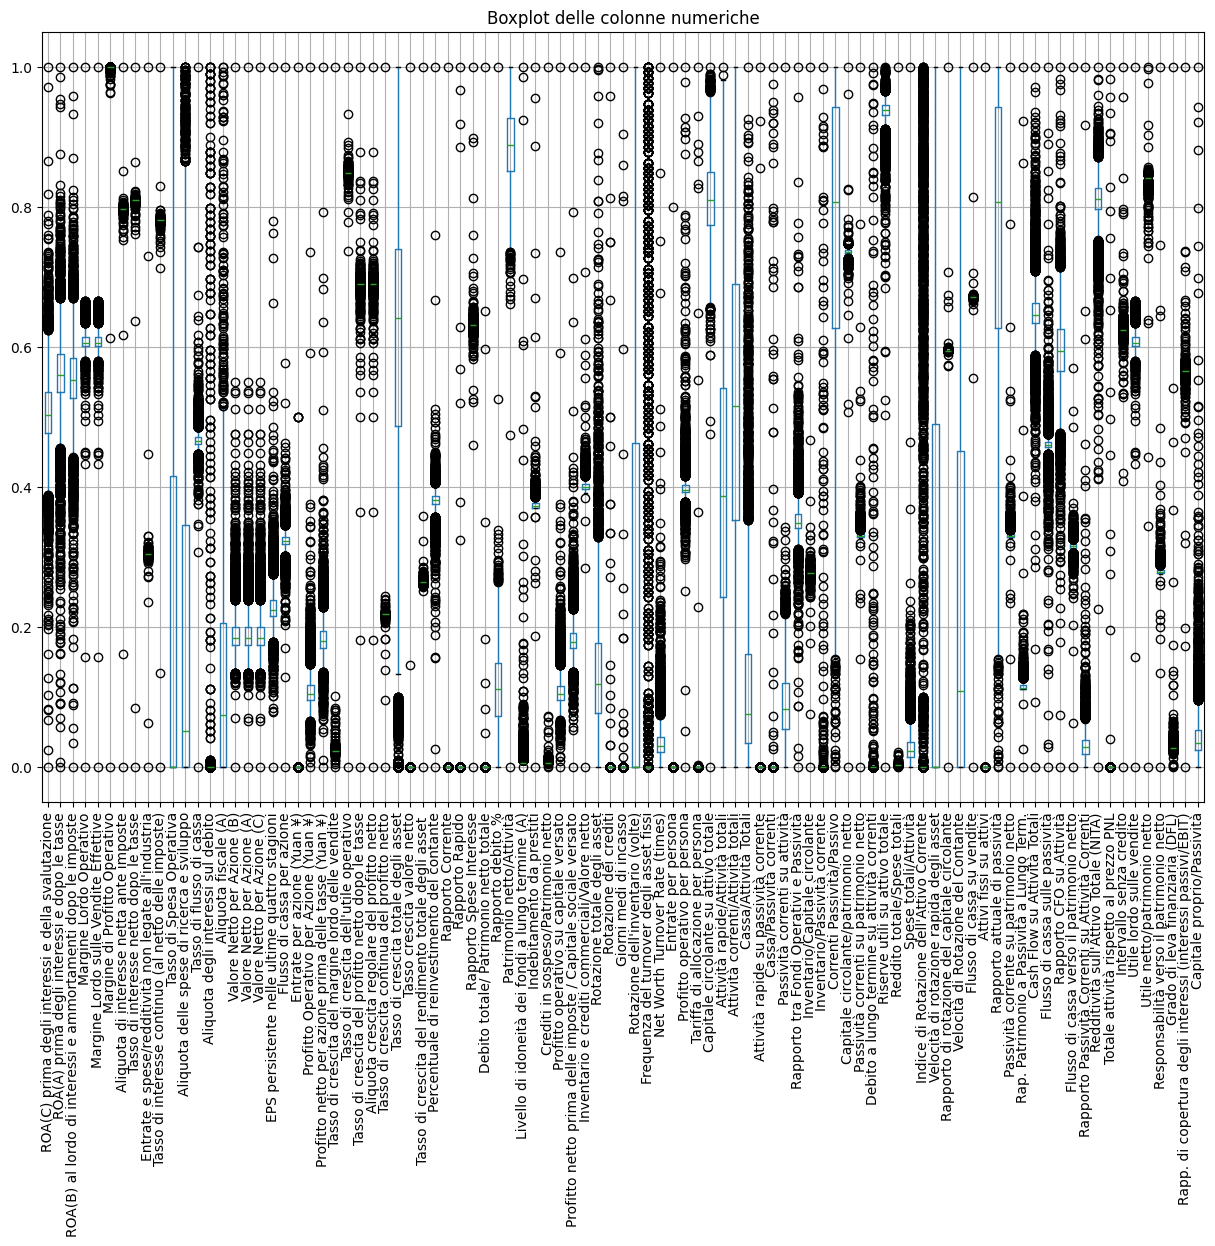

In [15]:
numeric_columns = x.select_dtypes(include=['float64', 'int64']).columns

X_num = x[numeric_columns]

# Rimozione colonne binarie e normalizzazione

num_not_dummy_cols = X_num.columns[X_num.nunique() > 2]
X_num = X_num[num_not_dummy_cols]
normalized_df=(X_num-X_num.min())/(X_num.max()-X_num.min())
normalized_df.head()
# Boxplot normalizzato e senza colonne binarie

plt.figure(figsize=(15, 10))
normalized_df.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot delle colonne numeriche')
plt.show()

In [16]:
df[df['Bancarotta'] == 1].shape

(220, 35)

In [17]:
df_zeros = df[df['Bancarotta'] == 0]
df_ones = df[df['Bancarotta'] == 1]
n_desired_ones = 450
df_zeros = df_zeros.sample(n_desired_ones, random_state=42)
df_unbalanced = pd.concat([df_zeros, df_ones])
df_unbalanced

ROA(B) al lordo di interessi e ammortamenti dopo le imposte  \
2236                                              0.524             
5538                                              0.559             
4593                                              0.557             
6315                                              0.503             
4205                                              0.596             
...                                                 ...             
6591                                              0.461             
6640                                              0.221             
6641                                              0.378             
6642                                              0.380             
6728                                              0.533             

      Margine Lordo Operativo  Tasso di interesse netto dopo le tasse  \
2236                    0.608                                   0.809   
5538                    0.612                                   0.809   
4593                    0.606                                   0.809   
6315                    0.598                                   0.809   
4205                    0.614                                   0.809   
...                       ...                                     ...   
6591                    0.613                                   0.809   
6640                    0.598                                   0.808   
6641                    0.591                                   0.809   
6642                    0.581                                   0.808   
6728                    0.618                                   0.809   

      Tasso di Spesa Operativa  Aliquota delle spese di ricerca e sviluppo  \
2236                     0.000                                       0.000   
5538                     0.000                              4640000000.000   
4593                     0.000                               543000000.000   
6315            7420000000.000                              1340000000.000   
4205                     0.000                              5450000000.000   
...                        ...                                         ...   
6591                     0.000                                       0.000   
6640                     0.000                              1880000000.000   
6641            5530000000.000                                       0.000   
6642                     0.000                                       0.000   
6728                     0.000                                       0.000   

      Tasso di flusso di cassa  Aliquota degli interessi sul debito  \
2236                     0.461                                0.000   
5538                     0.473                                0.000   
4593                     0.467                                0.000   
6315                     0.461                                0.000   
4205                     0.468                                0.000   
...                        ...                                  ...   
6591                     0.460                                0.001   
6640                     0.473                                0.000   
6641                     0.465                                0.000   
6642                     0.458                                0.000   
6728                     0.465                                0.000   

      Aliquota fiscale (A)  Valore Netto per Azione (A)  \
2236                 0.135                        0.175   
5538                 0.193                        0.209   
4593                 0.150                        0.171   
6315                 0.000                        0.159   
4205                 0.000                        0.185   
...                    ...                          ...   
6591                 0.000                        0.139   
6640                 0.000            

In [18]:
for i in df_unbalanced.columns:
    print(i)

ROA(B) al lordo di interessi e ammortamenti dopo le imposte
Margine Lordo Operativo
Tasso di interesse netto dopo le tasse
Tasso di Spesa Operativa
Aliquota delle spese di ricerca e sviluppo
Tasso di flusso di cassa
Aliquota degli interessi sul debito
Aliquota fiscale (A)
Valore Netto per Azione (A)
EPS persistente nelle ultime quattro stagioni
Flusso di cassa per azione
Tasso di crescita dell'utile operativo
Tasso crescita valore netto
Percentuale di reinvestimento del contante
Debito totale/ Patrimonio netto totale
Rapporto debito %
Patrimonio netto/Attività
Livello di idoneità dei fondi a lungo termine (A)
Indebitamento da prestiti
Crediti in sospeso/Patrimonio netto
Profitto operativo su capitale versato
Inventario e crediti commerciali/Valore netto
Rotazione totale degli asset
Profitto operativo per persona
Passività correnti su attività
Correnti Passività/Passivo
Capitale circolante/patrimonio netto
Debito a lungo termine su attività correnti
Riserve utili su attivo totale
Indice

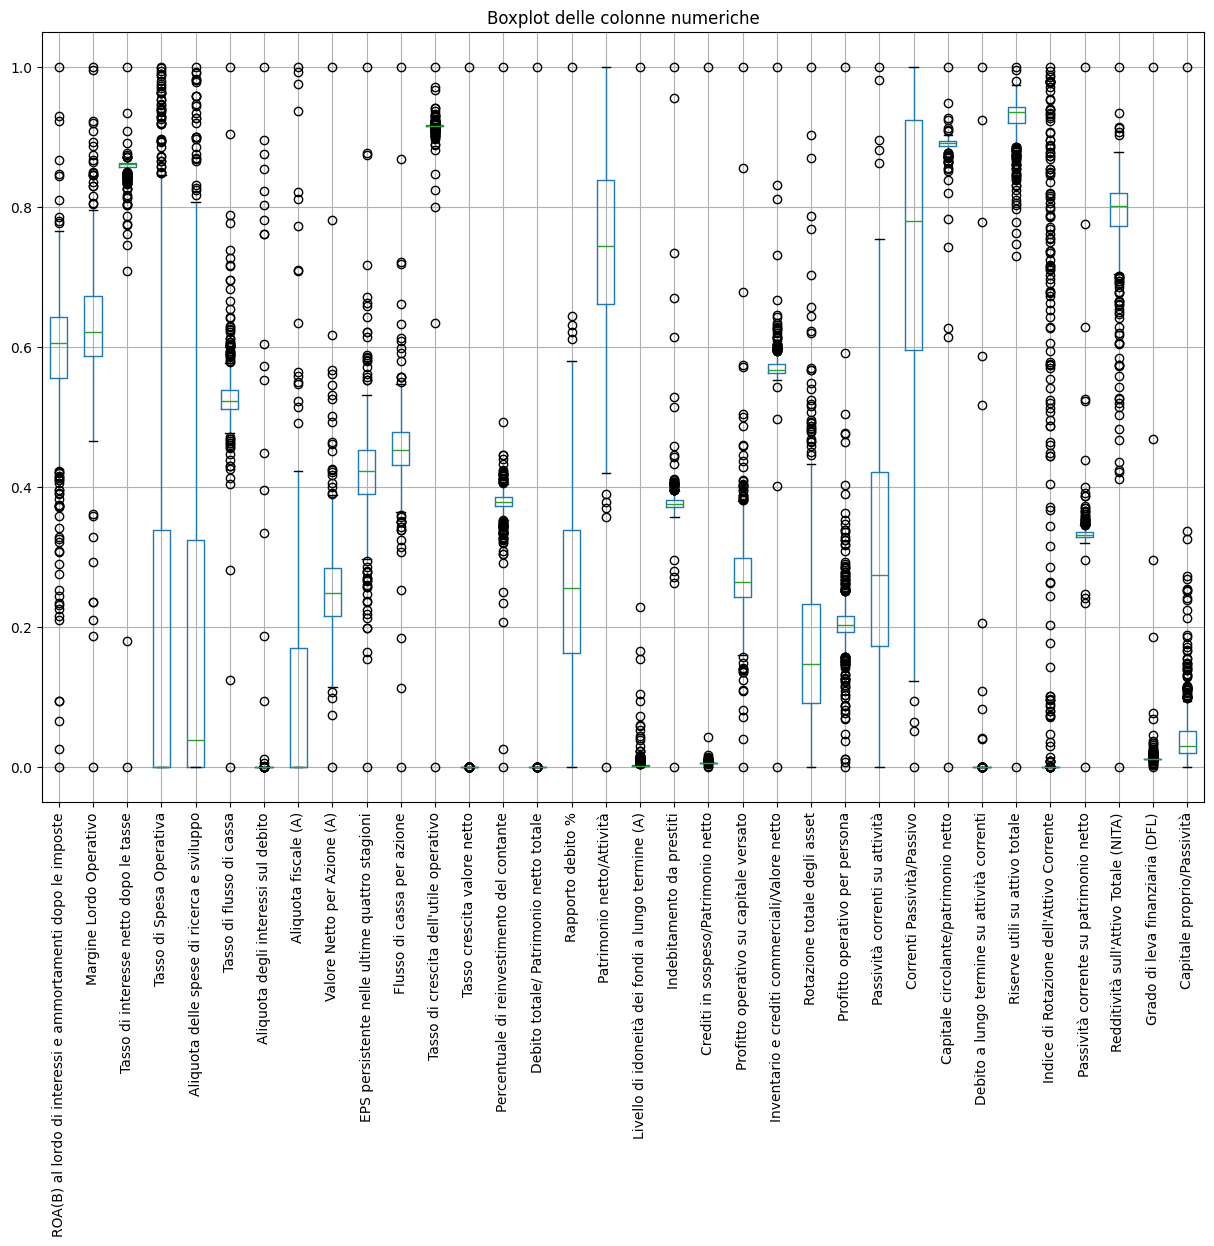

In [19]:
numeric_columns = df_unbalanced.select_dtypes(include=['float64', 'int64']).columns

X_num = df_unbalanced[numeric_columns]

# Rimozione colonne binarie e normalizzazione

num_not_dummy_cols = X_num.columns[X_num.nunique() > 2]
X_num = X_num[num_not_dummy_cols]
normalized_df=(X_num-X_num.min())/(X_num.max()-X_num.min())
normalized_df.head()
# Boxplot normalizzato e senza colonne binarie

plt.figure(figsize=(15, 10))
normalized_df.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot delle colonne numeriche')
plt.show()

In [20]:
df_unbalanced = standard_OHE(df_unbalanced, drop_first=True)
df_unbalanced.shape

(670, 35)

In [21]:
# Divisione Train e Test sets
x = df_unbalanced.drop(['Bancarotta'],axis=1)
y = df_unbalanced['Bancarotta']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)


(536, 34)
(134, 34)


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    """
    Calculate VIF
    """
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif = vif.sort_values(by="VIF", ascending=False).reset_index(drop=True)
    return vif

vif = calculate_vif(X_train)
print(vif)

                                             Variable        VIF
0                           Patrimonio netto/Attività 257969.865
1                                   Rapporto debito %   7799.665
2              Passività corrente su patrimonio netto     91.646
3                Capitale circolante/patrimonio netto     84.868
4                      Passività correnti su attività     32.875
5               Redditività sull'Attivo Totale (NITA)     20.224
6       Inventario e crediti commerciali/Valore netto     17.058
7                           Indebitamento da prestiti     16.911
8   ROA(B) al lordo di interessi e ammortamenti do...     15.158
9       EPS persistente nelle ultime quattro stagioni     13.386
10                Crediti in sospeso/Patrimonio netto     13.158
11             Debito totale/ Patrimonio netto totale      8.956
12                         Correnti Passività/Passivo      7.601
13                     Riserve utili su attivo totale      6.212
14             Profitto o

In [23]:
# Count features with high VIF
vif_threshold = 5
features_to_remove = vif[vif['VIF'] > vif_threshold]['Variable']

# Remove features with VIF > 5
X_train_uncorr = X_train.drop(columns=features_to_remove)

vif = calculate_vif(X_train_uncorr)
print(vif)
print("Features removed:", features_to_remove.shape[0])
print("Remaining features:", X_train_uncorr.shape[1])


                                             Variable       VIF
0              Tasso di interesse netto dopo le tasse 27768.982
1              Tasso di crescita dell'utile operativo 27641.255
2                             Margine Lordo Operativo  2505.076
3                            Tasso di flusso di cassa  1159.951
4                          Flusso di cassa per azione   845.942
5                      Profitto operativo per persona   299.611
6          Percentuale di reinvestimento del contante    97.117
7                         Valore Netto per Azione (A)    59.332
8                        Rotazione totale degli asset     3.578
9                          Capitale proprio/Passività     2.901
10                    Grado di leva finanziaria (DFL)     2.346
11  Livello di idoneità dei fondi a lungo termine (A)     1.692
12         Aliquota delle spese di ricerca e sviluppo     1.602
13                           Tasso di Spesa Operativa     1.582
14                               Aliquot

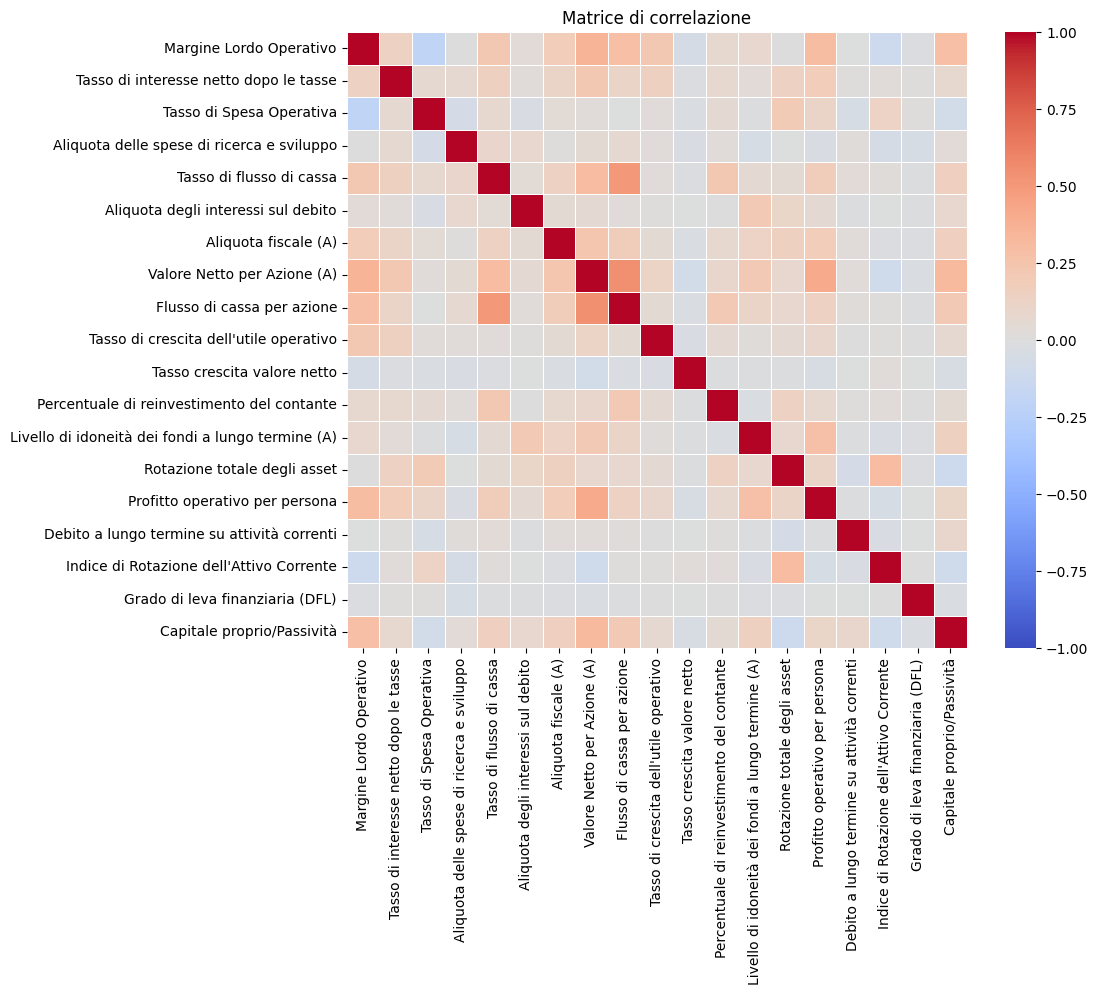

In [24]:
correlation_matrix = X_train_uncorr.corr()

#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matrice di correlazione')
plt.show()

In [25]:
def balance_with_SMOTE(x_train, y_train):
    """
    Balances the dataset using the Synthetic Minority Over-sampling Technique (SMOTE).
    """
    smote = SMOTE()
    x_train, y_train = smote.fit_resample(x_train, y_train)
    return x_train, y_train

vals_before_smote = y_train.value_counts()
vals_before_smote


Bancarotta
0    359
1    177
Name: count, dtype: int64

In [26]:
# sovradimensionamento del dataset
X_train_SMOTE, y_train_SMOTE = balance_with_SMOTE(x_train=X_train_uncorr, y_train=y_train)

In [27]:
vals_after_smote = y_train_SMOTE.value_counts()
vals_after_smote

Bancarotta
0    359
1    359
Name: count, dtype: int64

In [28]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_SMOTE, y_train_SMOTE)
y_train_pred = model.predict(X_train_SMOTE)

# Calcola accuracy
accuracy = accuracy_score(y_train_pred, y_train_SMOTE)
print("Accuracy:", accuracy)

Accuracy: 0.5097493036211699


In [29]:
def plot_confusion_matrix(y_test, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    plt.figure(figsize=(8, 6))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()    

In [30]:
def get_confusion_matrix_insights(y, y_pred):
   
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()


    sensitivity = recall_score(y, y_pred)
    fpr = fp / (fp + tn)
    specificity = tn / (tn + fp)
    precision = precision_score(y, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    gini = 2 * roc_auc - 1
    accuracy = metrics.accuracy_score(y, y_pred)


    print(f'Accuratezza: {accuracy:.2f}')
    print(f'Sensitività (Recall): {sensitivity:.2f}')
    print(f'False Positive Rate (FPR): {fpr:.2f}')
    print(f'Specificità (TNR): {specificity:.2f}')
    print(f'Precisione: {precision:.2f}')
    print('Gini coefficient: %.2f' % gini)

    return accuracy, sensitivity, gini

model_results = {}

In [31]:
def rfe_selection(X, y, k):
    model = LogisticRegression(max_iter=10000)
    rfe = RFE(model, n_features_to_select=k)
    rfe = rfe.fit(X, y)
    selected_features = X.columns[rfe.get_support(indices=True)]
    return X[selected_features]

In [32]:
def skb_selection(X, y, k):
    skb = SelectKBest(score_func=f_classif, k = k)
    skb = skb.fit(X, y)
    selected_features = X.columns[skb.get_support(indices=True)]
    return X[selected_features]

### Ciclo RFE: TRAIN

In [33]:
# ciclo rfe
accuracies_rfe = []
rfe_selections = {}

for k in tqdm(range(1,len(X_train_SMOTE.columns)+1)):
    
    # selezioniamo le k variabili
    x_selected = rfe_selection(X=X_train_SMOTE, y=y_train_SMOTE, k=k)

    # Store the selected features
    rfe_selections[k] = x_selected.columns

    # aggiungiamo una costante come richiesto dal modulo statsmodels
    X_train_w_intercept = sm.add_constant(x_selected)

    # facciamo un fitting del modello
    model = sm.Logit(y_train_SMOTE.to_numpy(),X_train_w_intercept).fit(disp=False)

    # prevediamo le probabilità
    y_pred = model.predict(X_train_w_intercept)

    # trasformiamo le probanilità in valori binari 
    y_pred = (y_pred > 0.5).astype(int)

    # calcoliamo l'accuracy del modello
    accuracy = metrics.accuracy_score(y_train_SMOTE, y_pred)
    print(f"Accuracy on TRAIN with {k} features: {accuracy}")

    # lo aggiungiamo alla lista 
    accuracies_rfe.append(accuracy)



 11%|█         | 2/19 [00:00<00:02,  7.01it/s]

Accuracy on TRAIN with 1 features: 0.5041782729805014
Accuracy on TRAIN with 2 features: 0.5125348189415042


 21%|██        | 4/19 [00:00<00:02,  7.31it/s]

Accuracy on TRAIN with 3 features: 0.5445682451253482
Accuracy on TRAIN with 4 features: 0.5431754874651811


 32%|███▏      | 6/19 [00:00<00:01,  7.73it/s]

Accuracy on TRAIN with 5 features: 0.5403899721448467
Accuracy on TRAIN with 6 features: 0.5376044568245125


 42%|████▏     | 8/19 [00:01<00:01,  8.31it/s]

Accuracy on TRAIN with 7 features: 0.7256267409470752
Accuracy on TRAIN with 8 features: 0.7311977715877437


 53%|█████▎    | 10/19 [00:01<00:01,  8.62it/s]

Accuracy on TRAIN with 9 features: 0.7520891364902507
Accuracy on TRAIN with 10 features: 0.8064066852367688


 63%|██████▎   | 12/19 [00:01<00:00,  9.01it/s]

Accuracy on TRAIN with 11 features: 0.8091922005571031
Accuracy on TRAIN with 12 features: 0.8676880222841226


 79%|███████▉  | 15/19 [00:01<00:00, 10.12it/s]

Accuracy on TRAIN with 13 features: 0.8704735376044568
Accuracy on TRAIN with 14 features: 0.8662952646239555
Accuracy on TRAIN with 15 features: 0.8746518105849582


100%|██████████| 19/19 [00:01<00:00,  9.69it/s]

Accuracy on TRAIN with 16 features: 0.8704735376044568
Accuracy on TRAIN with 17 features: 0.871866295264624
Accuracy on TRAIN with 18 features: 0.871866295264624
Accuracy on TRAIN with 19 features: 0.8760445682451253


In [34]:
k_rfe = 12

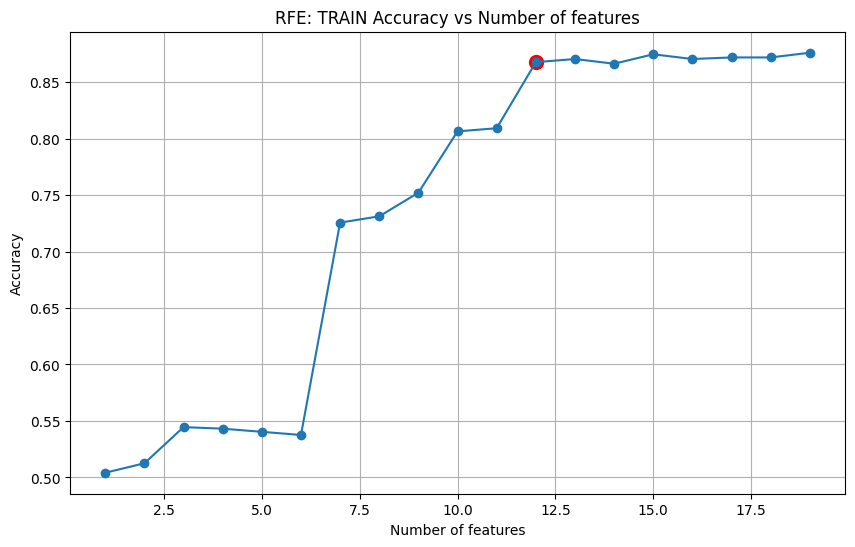

In [35]:
# Plot accuracies
plt.figure(figsize=(10, 6))
plt.scatter(k_rfe, accuracies_rfe[k_rfe-1], color='red', label='Choosen number of features', s=100)
plt.plot(range(1, len(X_train_SMOTE.columns)+1), accuracies_rfe, marker='o')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('RFE: TRAIN Accuracy vs Number of features')
plt.grid()
plt.show()


### Ciclo SKB: TRAIN

In [36]:
# ciclo skb
accuracies_skb = []
skb_selections = {}

for k in tqdm(range(1,len(X_train_SMOTE.columns)+1)):
    
    # selezioniamo le k variabili
    x_selected_skb = skb_selection(X=X_train_SMOTE, y=y_train_SMOTE, k=k)

    # Store the selected features
    skb_selections[k] = x_selected_skb.columns

    # aggiungiamo una costante come richiesto dal modulo statsmodels
    X_train_w_intercept = sm.add_constant(x_selected_skb)

    # facciamo un fitting del modello
    model = sm.Logit(y_train_SMOTE.to_numpy(),X_train_w_intercept).fit(disp=False)

    # prevediamo le probabilità
    y_pred = model.predict(X_train_w_intercept)

    # trasformiamo le probanilità in valori binari 
    y_pred = (y_pred > 0.5).astype(int)

    # calcoliamo l'accuracy del modello
    accuracy = metrics.accuracy_score(y_train_SMOTE, y_pred)
    print(f"Accuracy with {k} features: {accuracy}")

    # lo aggiungiamo alla lista 
    accuracies_skb.append(accuracy)


100%|██████████| 19/19 [00:00<00:00, 98.14it/s] 

Accuracy with 1 features: 0.786908077994429
Accuracy with 2 features: 0.8328690807799443
Accuracy with 3 features: 0.8440111420612814
Accuracy with 4 features: 0.8523676880222841
Accuracy with 5 features: 0.8579387186629527
Accuracy with 6 features: 0.8635097493036211
Accuracy with 7 features: 0.8523676880222841
Accuracy with 8 features: 0.8704735376044568
Accuracy with 9 features: 0.8704735376044568
Accuracy with 10 features: 0.8704735376044568
Accuracy with 11 features: 0.871866295264624
Accuracy with 12 features: 0.8704735376044568
Accuracy with 13 features: 0.8676880222841226
Accuracy with 14 features: 0.8690807799442897
Accuracy with 15 features: 0.8704735376044568
Accuracy with 16 features: 0.871866295264624
Accuracy with 17 features: 0.871866295264624
Accuracy with 18 features: 0.8746518105849582
Accuracy with 19 features: 0.8760445682451253


In [37]:
k_skb = 6

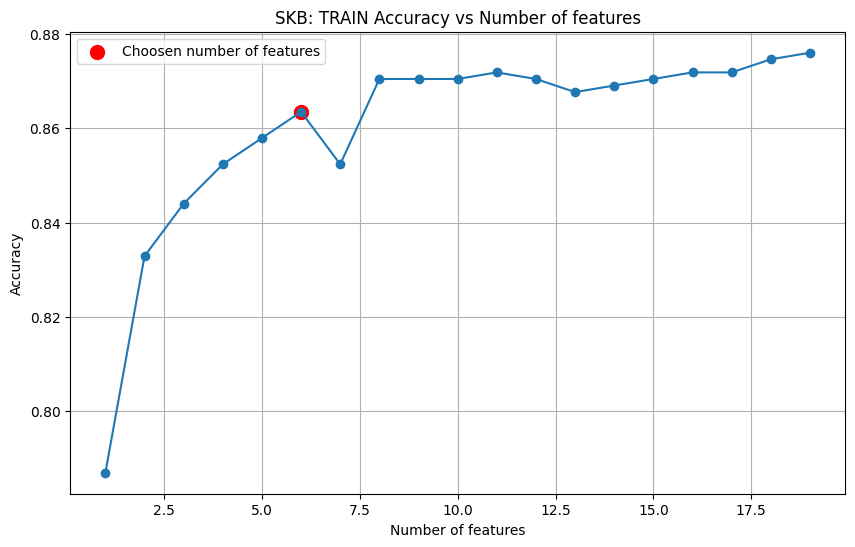

In [38]:
# Plot accuracies
plt.figure(figsize=(10, 6))
plt.scatter(k_skb, accuracies_skb[k_skb-1], color='red', label='Choosen number of features', s=100)
plt.plot(range(1, len(X_train_SMOTE.columns)+1), accuracies_skb, marker='o' )
plt.legend()
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('SKB: TRAIN Accuracy vs Number of features')
plt.grid()
plt.show()


In [39]:
X_train_w_intercept = sm.add_constant(x_selected_skb)
est = sm.Logit(y_train_SMOTE.to_numpy(), X_train_w_intercept).fit()
est.summary2().tables[1]
y_prob = est.predict(X_train_w_intercept)
y_pred = (y_prob > 0.5).astype(int)

Optimization terminated successfully.
         Current function value: 0.310506
         Iterations 16


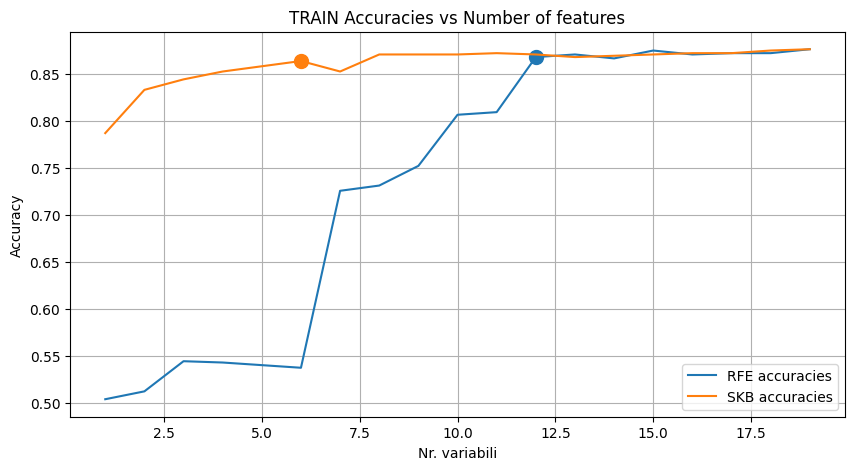

In [40]:
#Plot accuracies RFE e SKB a confronto

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(X_train_SMOTE.columns)+1), accuracies_rfe, label='RFE accuracies')
plt.plot(range(1, len(X_train_SMOTE.columns)+1), accuracies_skb, label='SKB accuracies')
plt.scatter(k_rfe, accuracies_rfe[k_rfe-1], color='tab:blue', s=100)
plt.scatter(k_skb, accuracies_skb[k_skb-1], color='tab:orange', s=100)
plt.title('TRAIN Accuracies vs Number of features') 
plt.xlabel('Nr. variabili')
plt.ylabel('Accuracy')
plt.grid()
plt.legend() 
plt.show()

In [41]:
# Select the best features for RFE and SKB
X_train_skb = X_train_SMOTE[skb_selections[k_skb]]
X_train_rfe = X_train_SMOTE[rfe_selections[k_rfe]]

### Prediction on TEST: SKB

In [42]:
# Select the best features for RFE and SKB
X_test_skb = X_test[skb_selections[k_skb]]
X_test_rfe = X_test[rfe_selections[k_rfe]]

In [43]:
# Fit the model SKB on TRAIN
X_train_w_intercept = sm.add_constant(X_train_skb)
est = sm.Logit(y_train_SMOTE.to_numpy(), X_train_w_intercept).fit()
print(est.summary2().tables[1])

# Select the best features for SKB on TEST
X_test_w_intercept = sm.add_constant(X_test_skb)

# Predict
y_prob = est.predict(X_test_w_intercept)
y_pred = (y_prob > 0.5).astype(int)


Optimization terminated successfully.
         Current function value: 0.377958
         Iterations 8
                                 Coef.  Std.Err.      z  P>|z|  [0.025  0.975]
const                           43.269     7.632  5.670  0.000  28.311  58.227
Margine Lordo Operativo        -10.282    10.915 -0.942  0.346 -31.675  11.112
Aliquota fiscale (A)            -1.561     0.971 -1.608  0.108  -3.463   0.342
Valore Netto per Azione (A)    -51.248     7.844 -6.533  0.000 -66.621 -35.874
Flusso di cassa per azione     -49.688    11.823 -4.203  0.000 -72.861 -26.515
Profitto operativo per persona -26.834     7.744 -3.465  0.001 -42.012 -11.656
Capitale proprio/Passività     -57.832    10.008 -5.779  0.000 -77.447 -38.217


<Figure size 800x600 with 0 Axes>

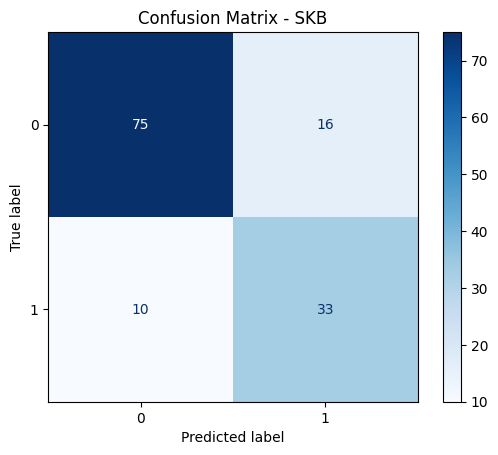

In [44]:
plot_confusion_matrix(y_test, y_pred, 'Confusion Matrix - SKB')

In [45]:
accuracy, sensitivity, gini = get_confusion_matrix_insights(y_test, y_pred)
model_results['SKB'] = {'accuracy': accuracy, 'sensitivity': sensitivity, 'gini': gini}

Accuratezza: 0.81
Sensitività (Recall): 0.77
False Positive Rate (FPR): 0.18
Specificità (TNR): 0.82
Precisione: 0.67
Gini coefficient: 0.59


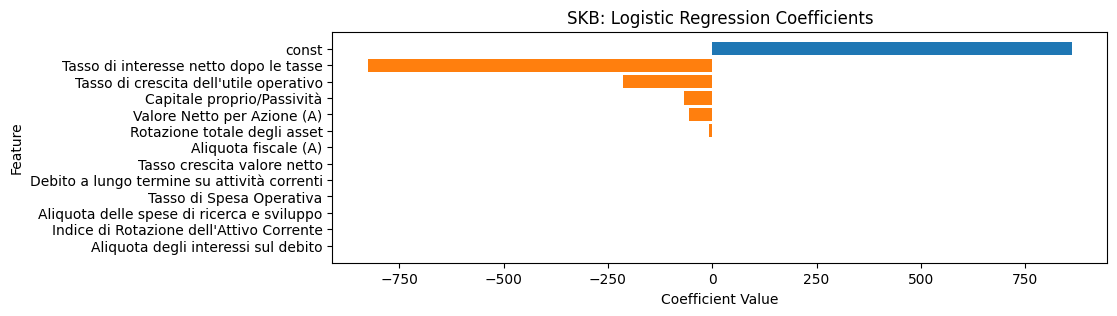

In [92]:
# Estrai i coefficienti dal modello
coefficients = est.params

# Crea un DataFrame per facilitare l'ordinamento
coef_df = pd.DataFrame({
    'Feature': X_train_w_intercept.columns,
    'Coefficient': coefficients
})

# Ordina i coefficienti in base al valore assoluto
coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

# Crea una lista di colori basata sul segno dei coefficienti
colors = ['tab:blue' if coef > 0 else 'tab:orange' for coef in coef_df['Coefficient']]

# Crea il grafico a barre
plt.figure(figsize=(10, 3))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('SKB: Logistic Regression Coefficients')
plt.gca().invert_yaxis()  # Invert the y-axis to have the largest coefficient at the top
plt.show()


### Prediction on TEST: RFE

In [47]:
# Fit the model
X_train_w_intercept = sm.add_constant(X_train_rfe)
est = sm.Logit(y_train_SMOTE.to_numpy(), X_train_w_intercept).fit()
print(est.summary2().tables[1])

# Select the best features for RFE on TEST
X_test_w_intercept = sm.add_constant(X_test_rfe)

# Predict
y_prob = est.predict(X_test_w_intercept)
y_pred = (y_prob > 0.5).astype(int)

Optimization terminated successfully.
         Current function value: 0.360668
         Iterations 17
                                               Coef.  Std.Err.      z  P>|z|  \
const                                        862.898   331.738  2.601  0.009   
Tasso di interesse netto dopo le tasse      -826.177   391.238 -2.112  0.035   
Tasso di Spesa Operativa                       0.000     0.000  1.390  0.165   
Aliquota delle spese di ricerca e sviluppo    -0.000     0.000 -0.463  0.643   
Aliquota degli interessi sul debito           -0.000     0.000 -0.002  0.999   
Aliquota fiscale (A)                          -1.295     0.921 -1.407  0.160   
Valore Netto per Azione (A)                  -56.499     8.347 -6.769  0.000   
Tasso di crescita dell'utile operativo      -214.343   187.213 -1.145  0.252   
Tasso crescita valore netto                    0.000     0.000  0.004  0.996   
Rotazione totale degli asset                  -7.114     1.598 -4.453  0.000   
Debito a lungo te

<Figure size 800x600 with 0 Axes>

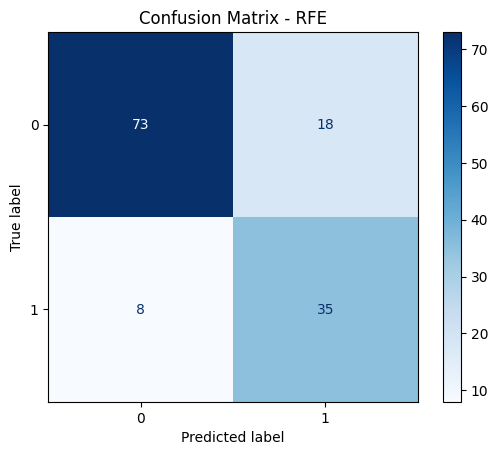

In [48]:
plot_confusion_matrix(y_test, y_pred, 'Confusion Matrix - RFE')

In [49]:
accuracy, sensitivity, gini = get_confusion_matrix_insights(y_test, y_pred)
model_results['RFE'] = {'accuracy': accuracy, 'sensitivity': sensitivity, 'gini': gini}

Accuratezza: 0.81
Sensitività (Recall): 0.81
False Positive Rate (FPR): 0.20
Specificità (TNR): 0.80
Precisione: 0.66
Gini coefficient: 0.62


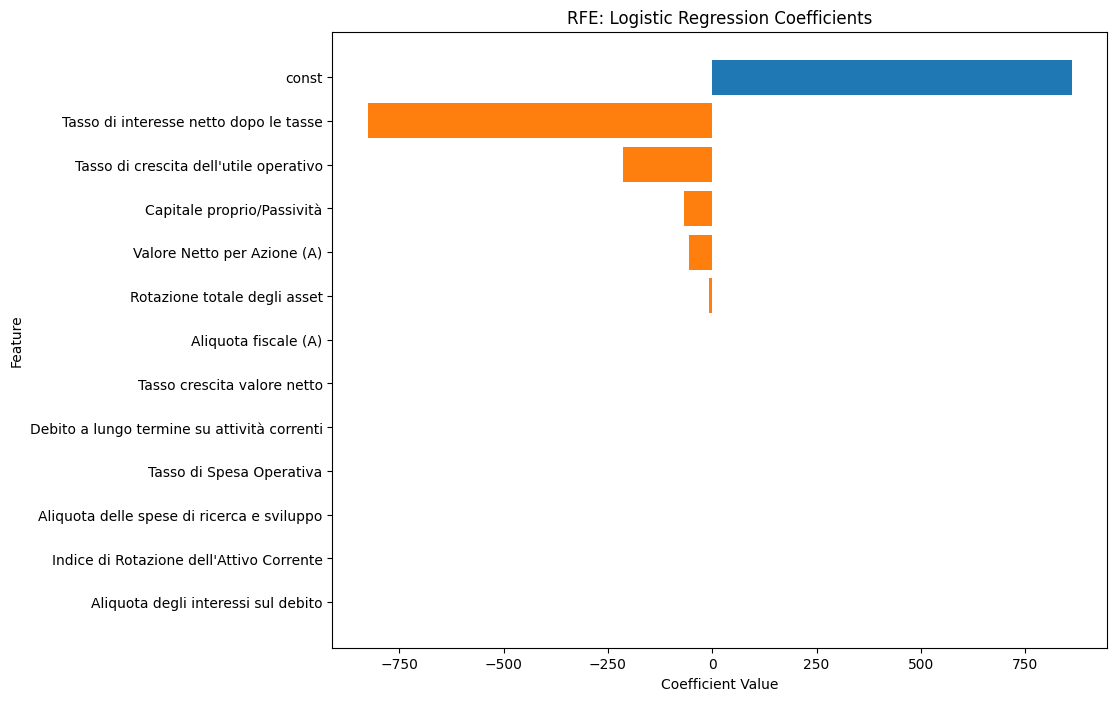

In [50]:
# Estrai i coefficienti dal modello
coefficients = est.params

# Crea un DataFrame per facilitare l'ordinamento
coef_df = pd.DataFrame({
    'Feature': X_train_w_intercept.columns,
    'Coefficient': coefficients
})

# Ordina i coefficienti in base al valore assoluto
coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

# Crea una lista di colori basata sul segno dei coefficienti
colors = ['tab:blue' if coef > 0 else 'tab:orange' for coef in coef_df['Coefficient']]

# Crea il grafico a barre
plt.figure(figsize=(10, 8))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('RFE: Logistic Regression Coefficients')
plt.gca().invert_yaxis()  # Invert the y-axis to have the largest coefficient at the top
plt.show()


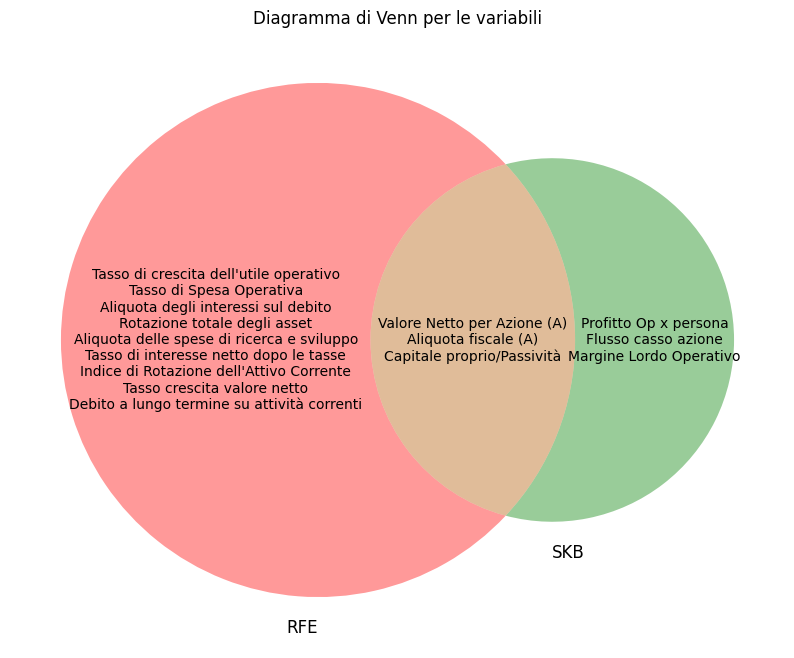

In [51]:
rfe_cols = list(X_train_rfe.columns)
skb_cols = list(X_train_skb.columns)

# sostituisci in skb_cols il nome 'Profitto operativo' con 'Prof Oper'
skb_cols.append('Profitto Op x persona')
skb_cols.remove('Profitto operativo per persona')

skb_cols.append('Flusso casso azione')
skb_cols.remove('Flusso di cassa per azione')



set1 = set(rfe_cols)
set2 = set(skb_cols)

# Crea il diagramma di Venn
plt.figure(figsize=(10, 10))
venn_diagram = venn2([set1, set2], ('RFE', 'SKB'))

# Assegna i nomi delle parole alle etichette nelle aree corrispondenti del diagramma di Venn
venn_diagram.get_label_by_id('10').set_text('\n'.join(set1 - set2))
venn_diagram.get_label_by_id('11').set_text('\n'.join(set1 & set2))
venn_diagram.get_label_by_id('01').set_text('\n'.join(set2 - set1))

# Mostra il grafico
plt.title("Diagramma di Venn per le variabili")
plt.show()

# PCA

## Standardizzazione

In [52]:
# select numerical columns
X_train_num = X_train_SMOTE.select_dtypes(include=[np.number])

# Standardize the data ----> Very impo for PCA!
scaler = StandardScaler()

# Standardize the data
df_standardized = scaler.fit_transform(X_train_num)
df_standardized = pd.DataFrame(df_standardized, columns=X_train_num.columns)
df_standardized.head()

Margine Lordo Operativo  Tasso di interesse netto dopo le tasse  \
0                    1.073                                   0.337   
1                   -0.363                                  -0.474   
2                    0.078                                  -0.006   
3                    1.034                                   0.327   
4                   -0.834                                   0.221   

   Tasso di Spesa Operativa  Aliquota delle spese di ricerca e sviluppo  \
0                     2.053                                       0.981   
1                    -0.614                                      -0.731   
2                    -0.614                                      -0.731   
3                    -0.614                                      -0.731   
4                     0.391                                      -0.238   

   Tasso di flusso di cassa  Aliquota degli interessi sul debito  \
0                     1.929                                3.431   
1                     0.092                               -0.132   
2                    -0.031                               -0.132   
3                     0.067                               -0.132   
4                     0.185                               -0.132   

   Aliquota fiscale (A)  Valore Netto per Azione (A)  \
0                 1.436                        0.394   
1                -0.559                       -1.637   
2                -0.559                       -0.609   
3                 1.302                        0.757   
4                -0.559                       -0.711   

   Flusso di cassa per azione  Tasso di crescita dell'utile operativo  \
0                       0.694                                   0.068   
1                       0.227                                  -0.185   
2                       0.113                                   0.075   
3                       0.231                                   0.089   
4                       0.326                                   0.097   

   Tasso crescita valore netto  Percentuale di reinvestimento del contante  \
0                       -0.060                                       0.105   
1                       -0.060                                       0.303   
2                       -0.060                                       0.144   
3                       -0.060                                       0.021   
4                       -0.060                                       0.252   

   Livello di idoneità dei fondi a lungo termine (A)  \
0                                             -0.126   
1                                             -0.229   
2                                             -0.157   
3                                             -0.137   
4                                             -0.217   

   Rotazione totale degli asset  Profitto operativo per persona  \
0                        -0.563                           0.904   
1                        -0.394                          -0.553   
2                        -0.919                          -0.254   
3                         0.908                           0.205   
4                        -0.631                          -0.104   

   Debito a lungo termine su attività correnti  \
0                                       -0.081   
1                                       -0.081   
2                                       -0.081   
3                                       -0.081   
4                                       -0.081   

   Indice di Rotazione dell'Attivo Corrente  Grado di leva finanziaria (DFL)  \
0                                    -0.436                           -0.070   
1                                     1.678                           -0.072   
2                                    -0.436                           -0.097   
3                                    -0.436                           -0.070   
4                                   

In [53]:
# Fit the PCA
pca = PCA(n_components=df_standardized.shape[1])
pca.fit(df_standardized)

# Transform the data
x_new_cols = df_standardized.columns
x_new = pca.fit_transform(df_standardized)

In [54]:
print(X_train.shape)
print(X_test.shape)

(536, 34)
(134, 34)


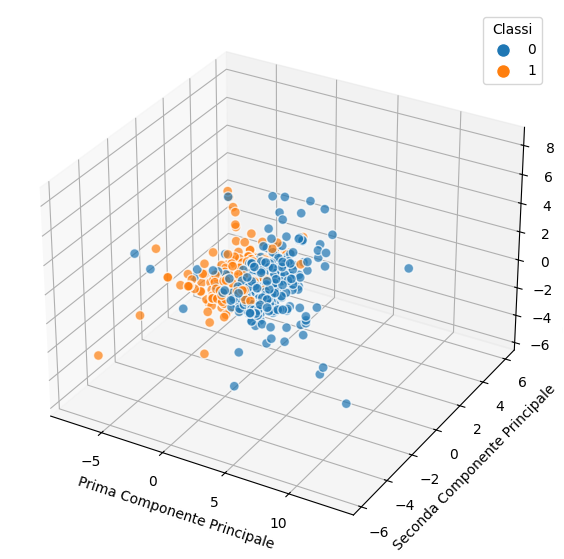

In [55]:
from mpl_toolkits.mplot3d import Axes3D

# Crea il grafico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Colori basati su y_train
colors = ['tab:blue' if label == 0 else 'tab:orange' for label in y_train_SMOTE] 

# Plotta i dati
scatter = ax.scatter(x_new[:, 0], x_new[:, 1], x_new[:, 2], c=colors, s=50, alpha=0.7, edgecolors='w')

# Aggiungi etichette agli assi
ax.set_xlabel('Prima Componente Principale')
ax.set_ylabel('Seconda Componente Principale')
ax.set_zlabel('Terza Componente Principale')

# Aggiungi una legenda
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:blue', markersize=10, label='0'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:orange', markersize=10, label='1')]
ax.legend(handles=legend_elements, title='Classi')

# Mostra il grafico
plt.show()

In [56]:
# Select numerical columns according to the selected features
x_test_num = X_test[x_new_cols]

# Standardize the test data
x_test_standardized = scaler.transform(x_test_num)
x_test_standardized = pd.DataFrame(x_test_standardized, columns=x_test_num.columns)

# Transform the test data
x_test_new = pca.transform(x_test_standardized)

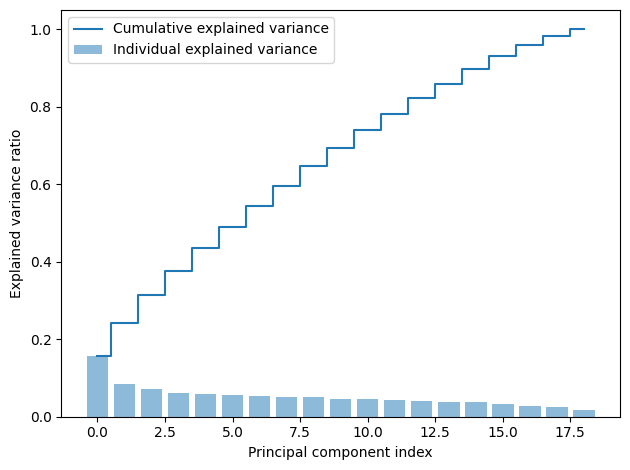

In [57]:
# Explained variance ratio
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [58]:
# Find index where cumulative explained variance is greater than a threshold
desidered_explained_variance = 0.75
index_selected = next(x[0] for x in enumerate(cum_sum_eigenvalues) if x[1] > desidered_explained_variance) + 1
print(f'Number of components explaining {desidered_explained_variance}% of variance: {index_selected}')

Number of components explaining 0.75% of variance: 12


In [59]:
# Make regression model on PCA

X_pca = x_new[:, :index_selected]
print(X_pca.shape)
print(y_train.shape)

# X_train, X_test, y_train, y_test = train_test_split(X_pca, y_train, test_size=0.2, random_state=42)
X_test_pca = x_test_new[:, :index_selected]

# Fit the model
model = LogisticRegression()
model.fit(X_pca, y_train_SMOTE)

# Predict the model
y_pred = model.predict(X_test_pca)

(718, 12)
(536,)


<Figure size 800x600 with 0 Axes>

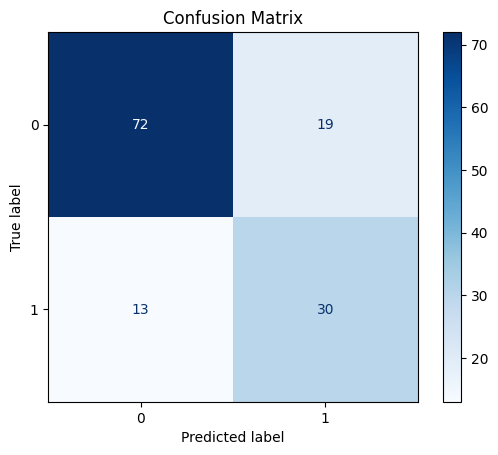

In [60]:
plot_confusion_matrix(y_test, y_pred)

In [61]:
accuracy, sensitivity, gini = get_confusion_matrix_insights(y_test, y_pred)
model_results['PCA'] = {'accuracy': accuracy, 'sensitivity': sensitivity, 'gini': gini}

Accuratezza: 0.76
Sensitività (Recall): 0.70
False Positive Rate (FPR): 0.21
Specificità (TNR): 0.79
Precisione: 0.61
Gini coefficient: 0.49


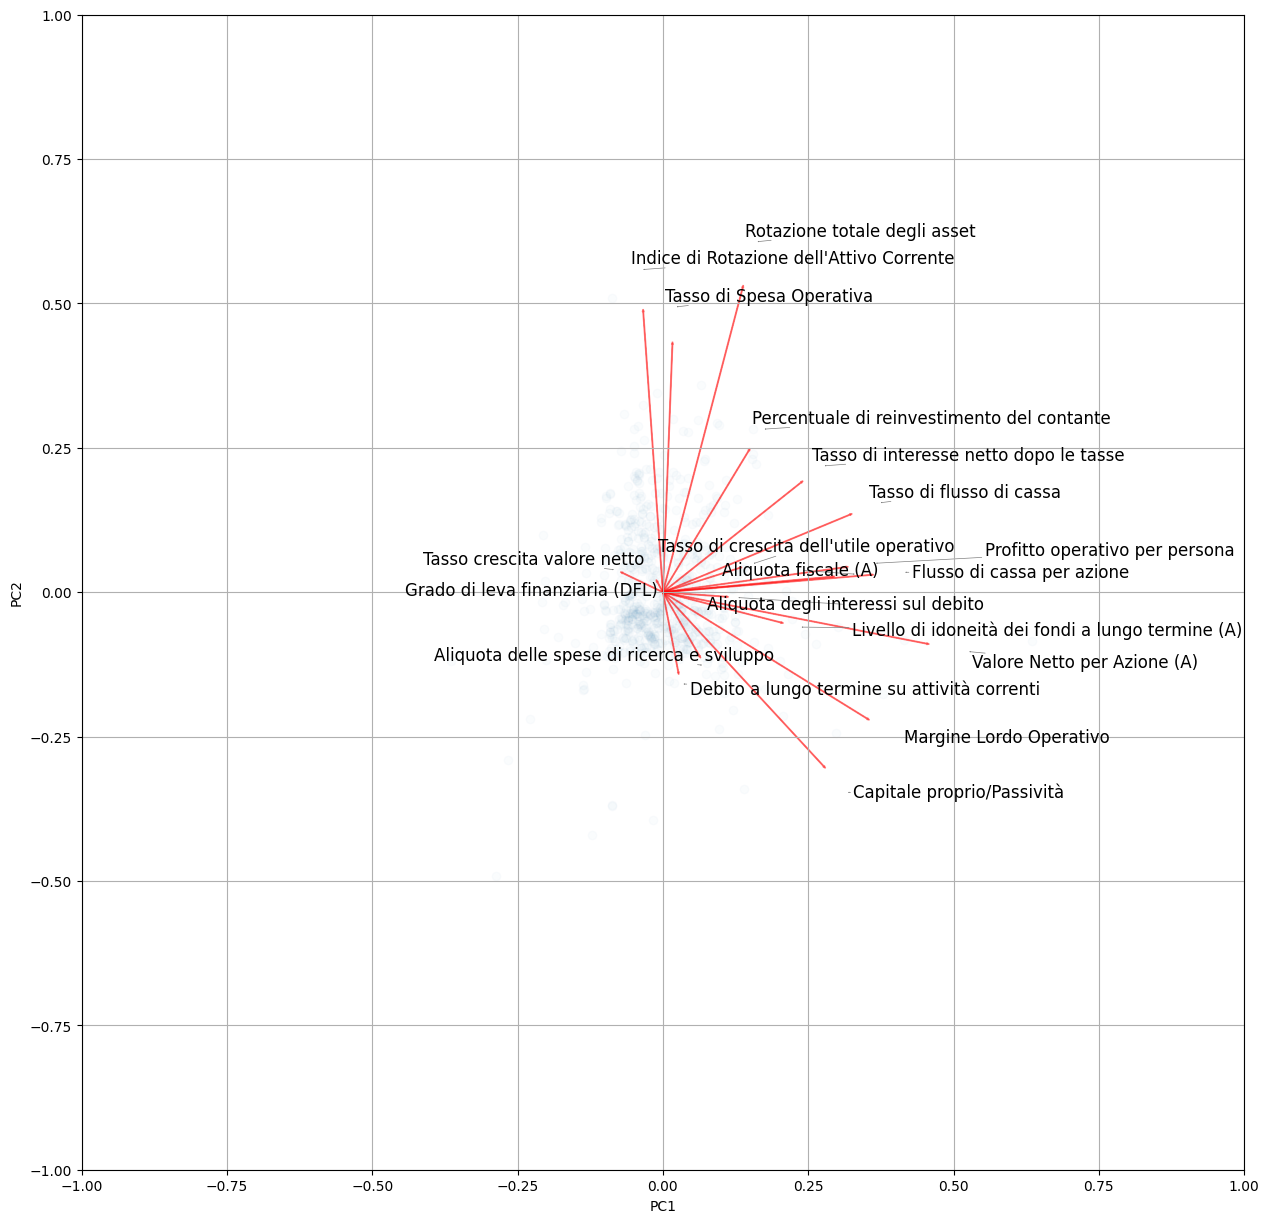

In [62]:
def myplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.figure(figsize=(15, 15))
    plt.scatter(xs * scalex, ys * scaley, alpha=0.02)
    
    texts = []
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        text = plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='black', ha='center', va='center', fontsize=12)
        texts.append(text)

    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

    adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))


#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]), x_new_cols)
plt.show()

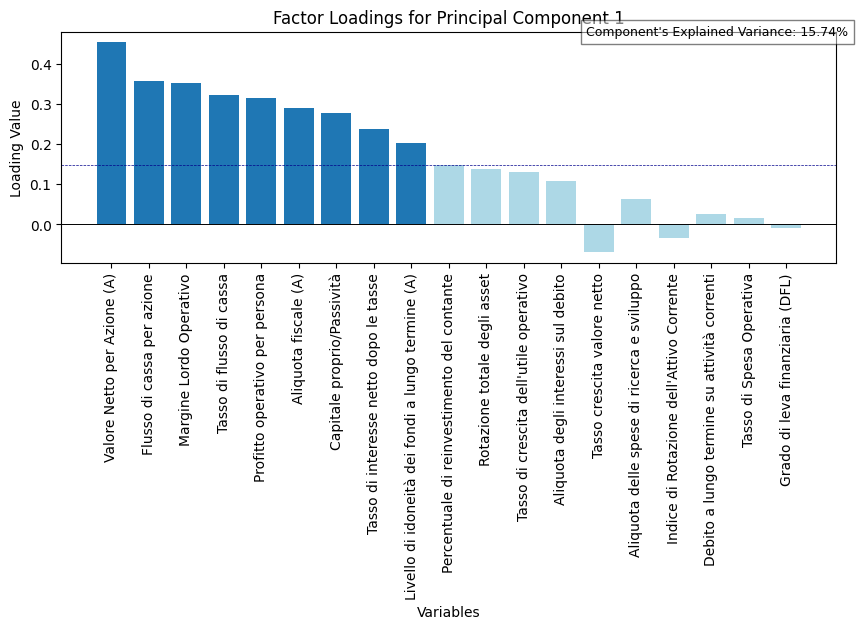

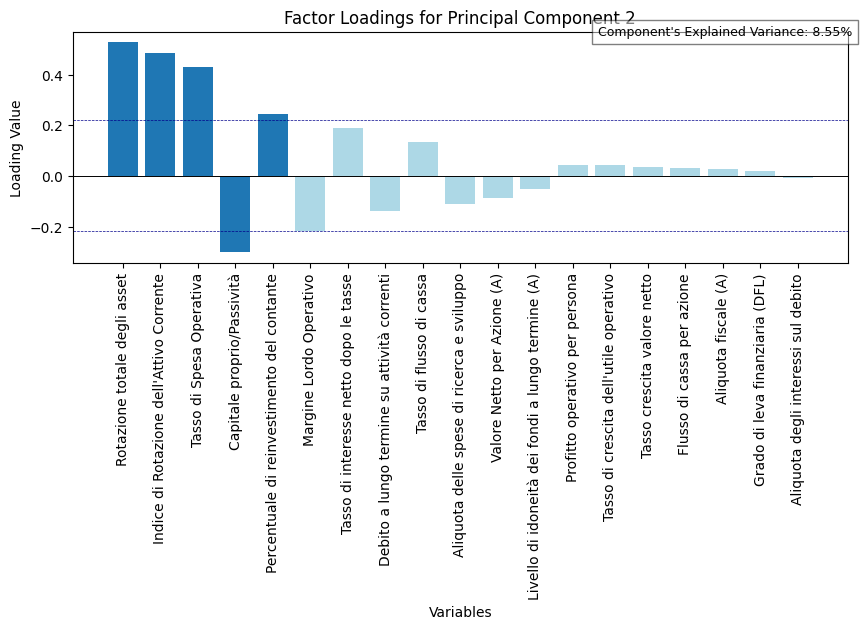

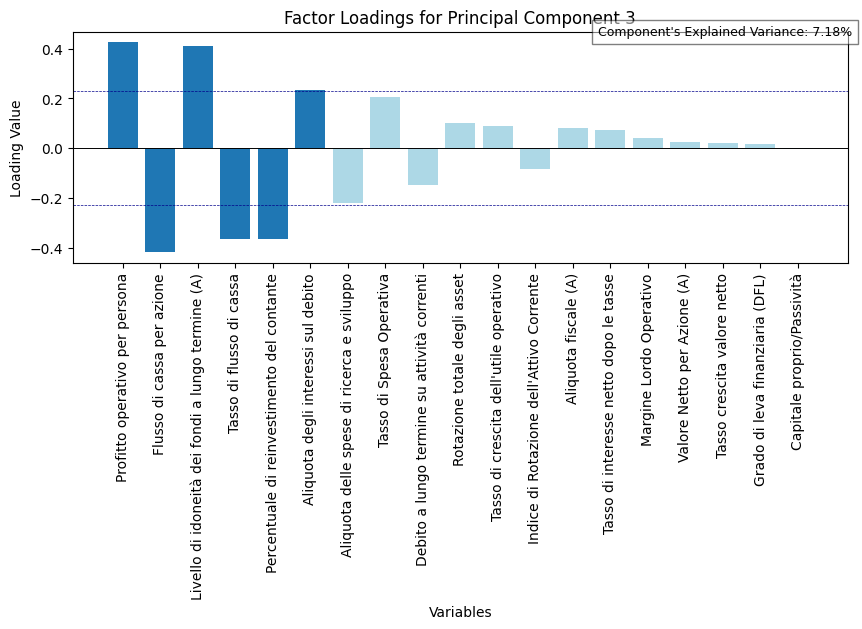

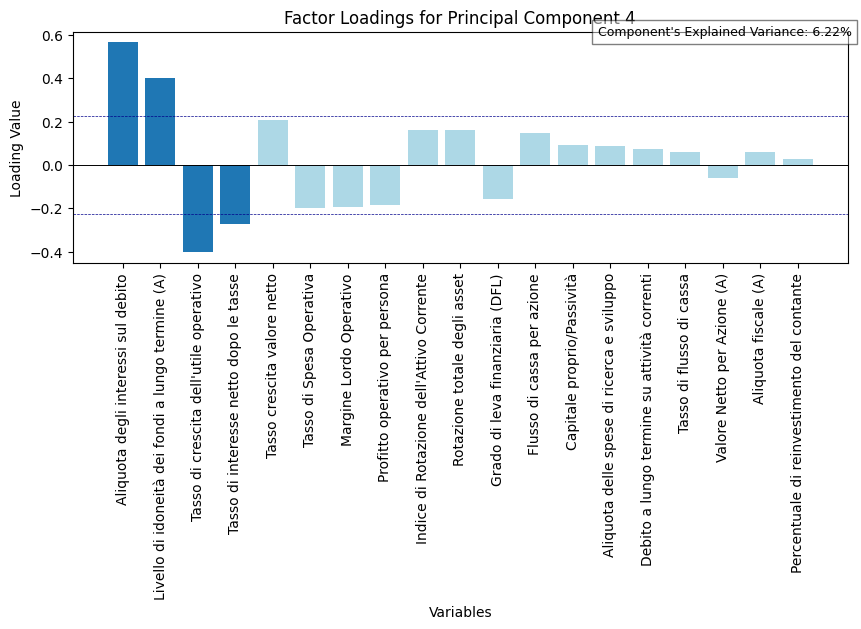

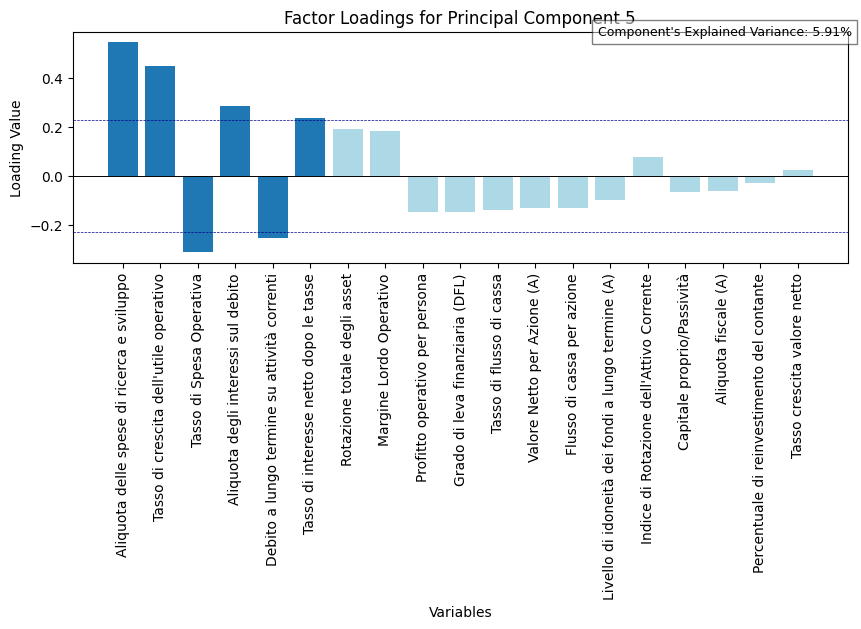

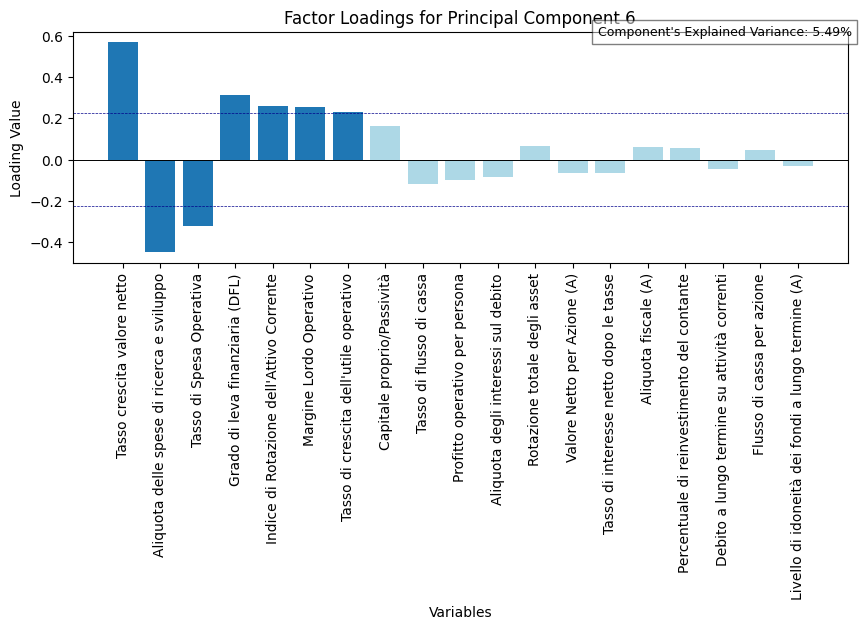

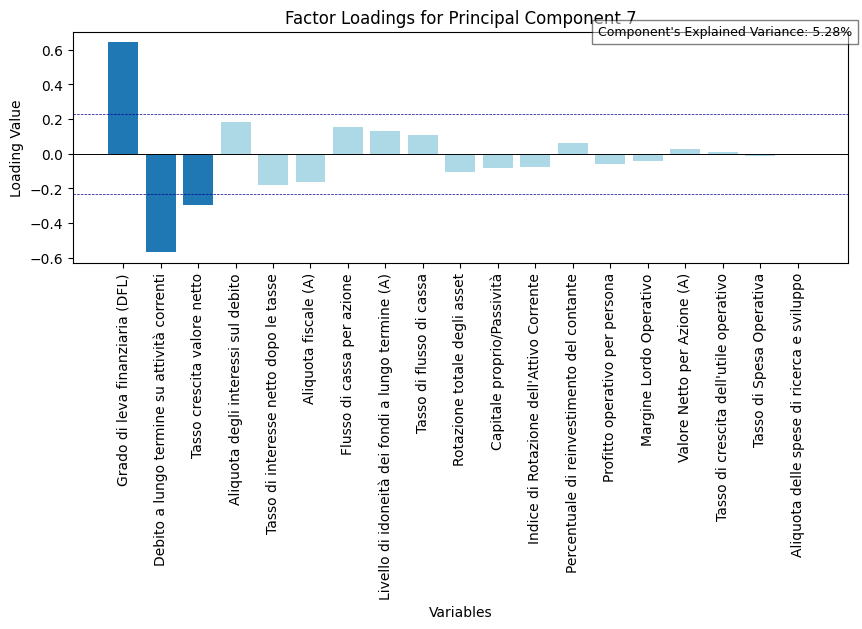

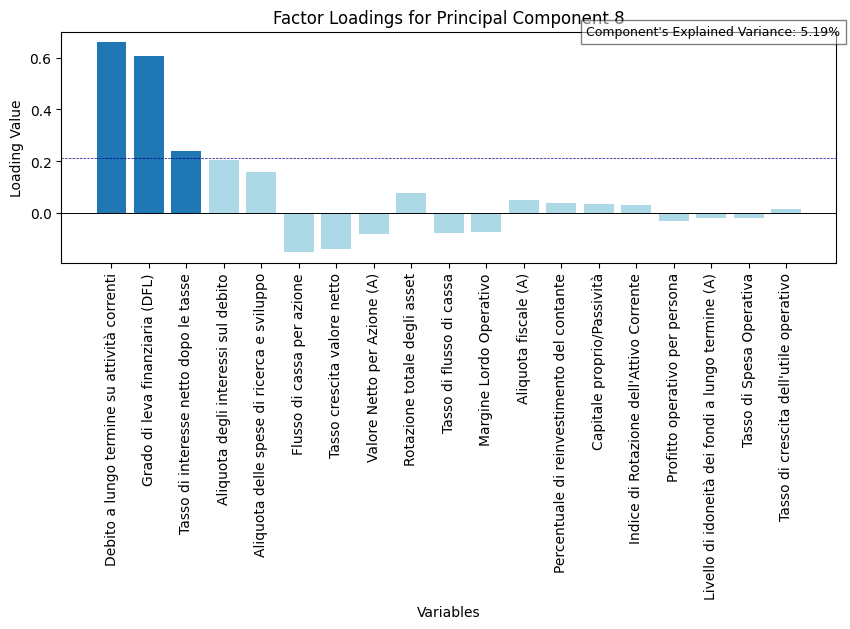

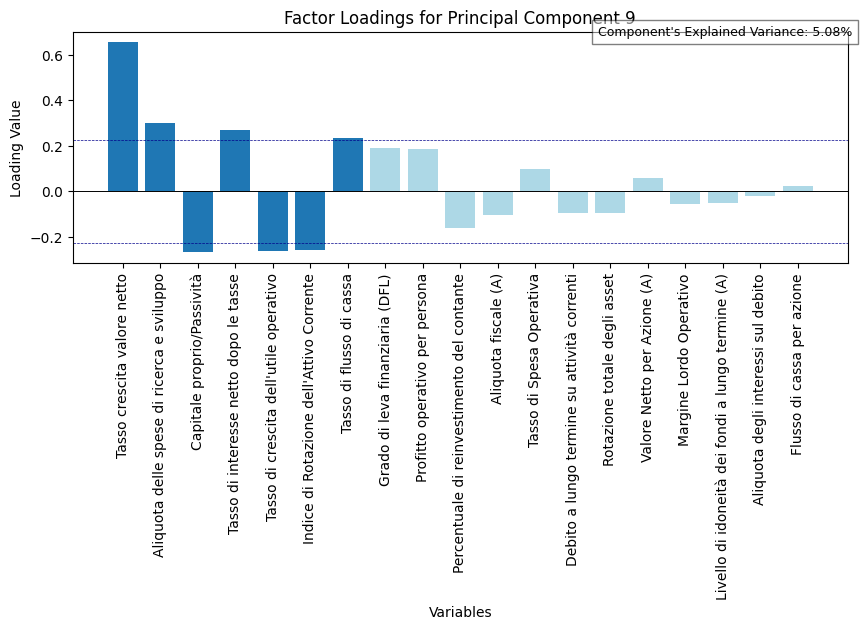

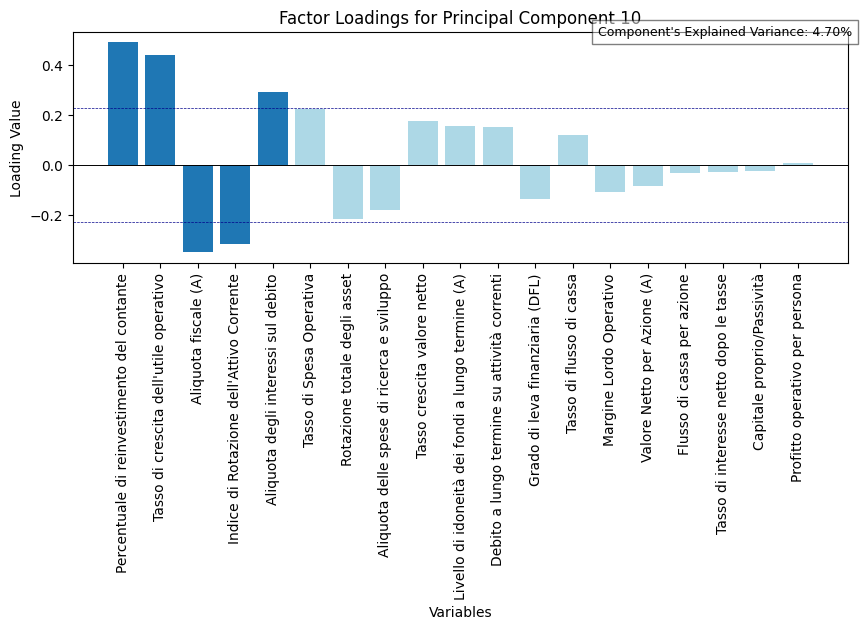

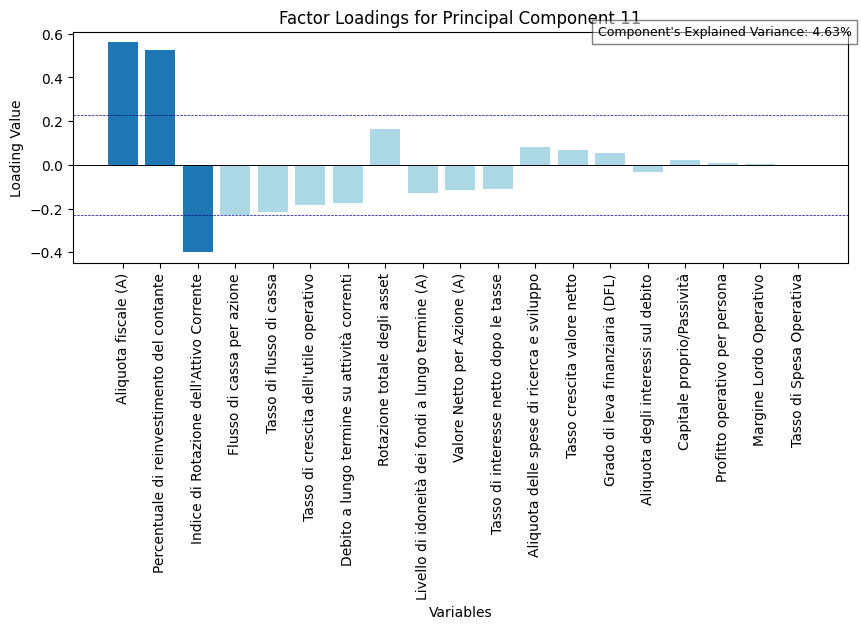

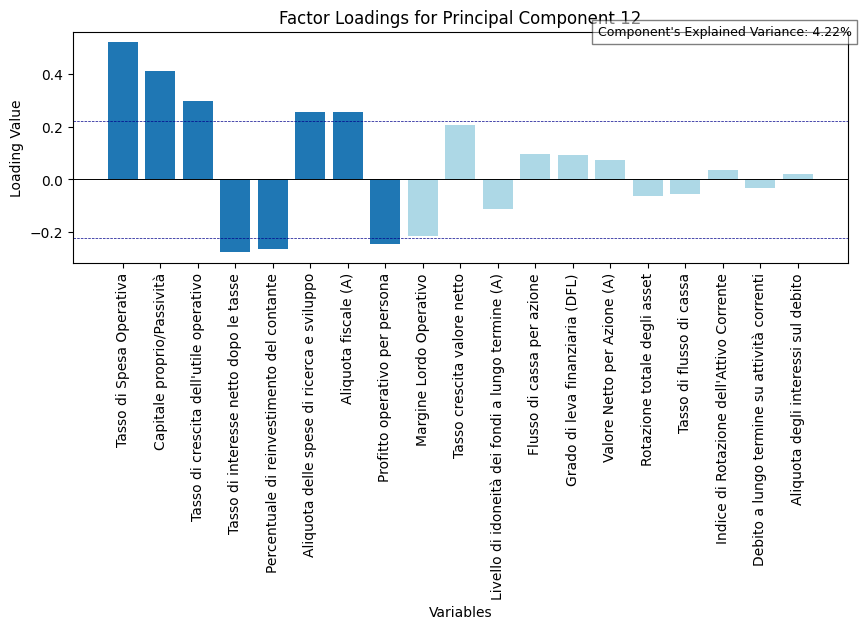

In [63]:
loadings = pca.components_.T

# Plotting the components to gain an explained variance threshold before defined
for i in range(index_selected): # range(loadings.shape[1]) to plot all components
    sorted_idx = np.argsort(abs(loadings[:, i]))[::-1]
    sorted_loadings = loadings[sorted_idx, i]
    vars = x_new_cols[sorted_idx]
    std_loading = np.std(sorted_loadings)
    
    # Colors based on comparison with the mean
    standart_blue = 'tab:blue'
    colors = [standart_blue if abs(loading) >= std_loading else 'lightblue' for loading in sorted_loadings]
    
    plt.figure(figsize=(10, 3))
    plt.bar(range(len(sorted_loadings)), sorted_loadings, color=colors)
    plt.title(f'Factor Loadings for Principal Component {i+1}')
    plt.xticks(range(len(sorted_loadings)), vars, rotation=90)
    plt.xlabel('Variables')
    plt.ylabel('Loading Value')
    plt.axhline(std_loading, color='darkblue', linestyle='--', linewidth=0.5)
    plt.axhline(0, color='black', linewidth=0.7)

    if sorted_loadings.min() < std_loading * -1:
        plt.axhline(-std_loading, color='darkblue', linestyle='--', linewidth=0.5)
        
    explained_variance = exp_var_pca[i] * 100  # convert to percentage
    textstr = f"Component's Explained Variance: {explained_variance:.2f}%"
    # Place the text box in the upper left corner
    plt.gcf().text(0.65, 0.9, textstr, fontsize=9, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    # plt.tight_layout()
    plt.show()

# Alberi Decisionali

In [64]:
# Model definition
model = DecisionTreeClassifier(random_state=42)

# Model training
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [65]:
# Previsione sui dati di test
y_pred = model.predict(X_test)

# Calcolo della precisione
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.77


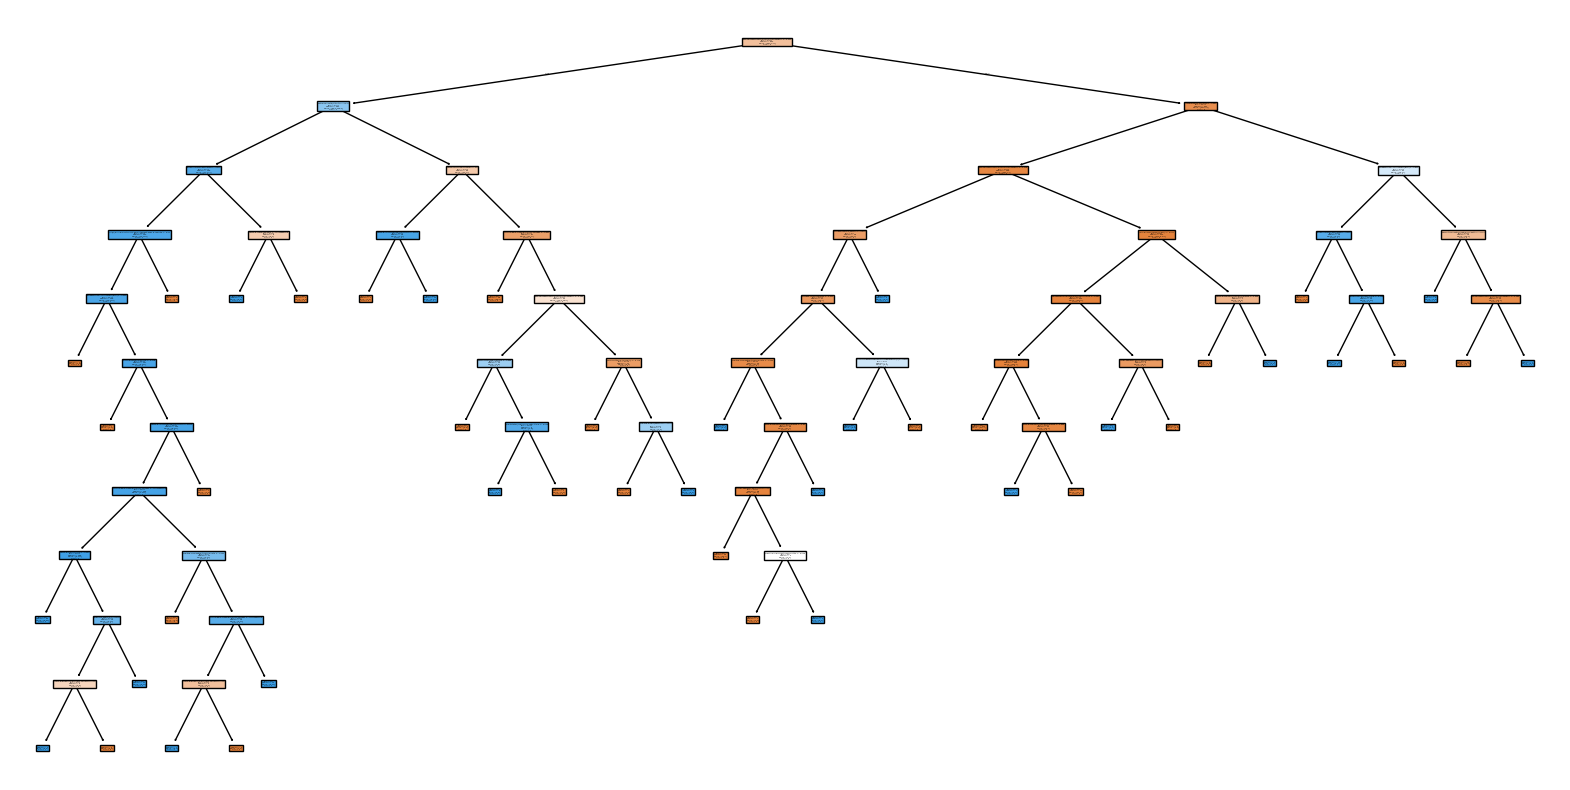

In [66]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=list(X_train.columns), class_names=["0","1"], filled=True)
plt.show()

Accuracy after pruning: 0.77


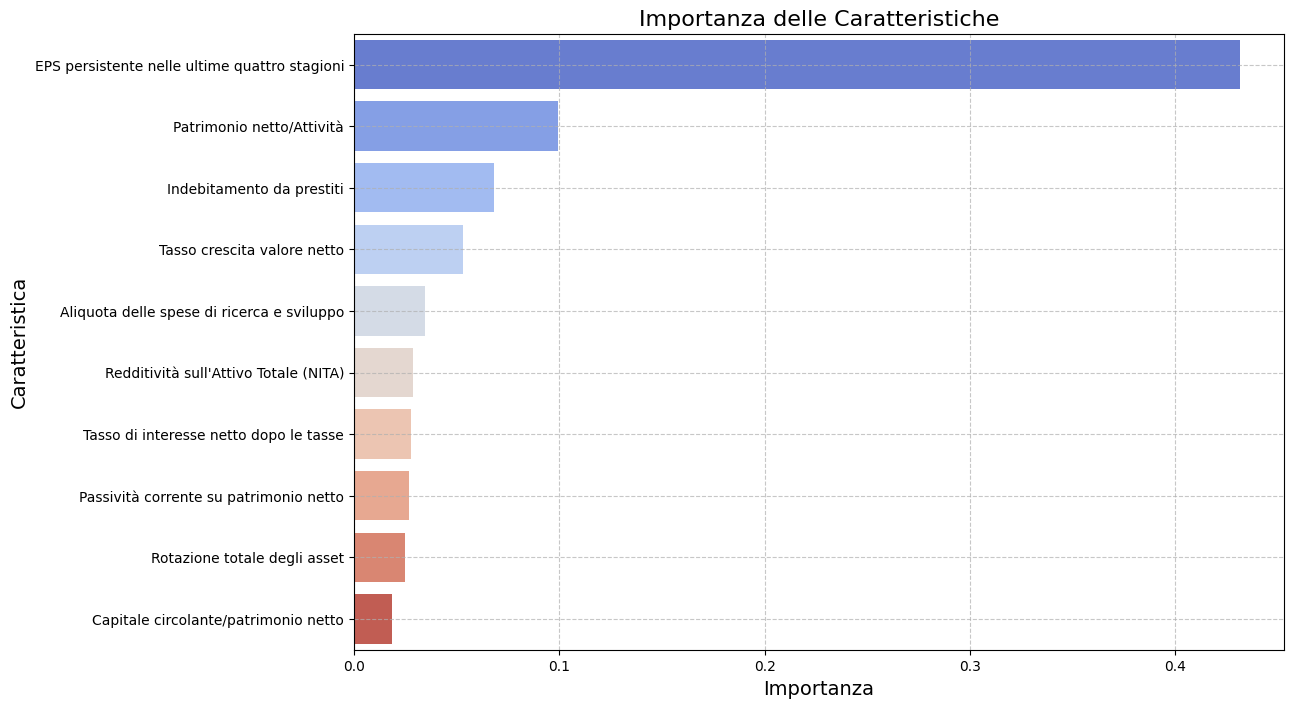

In [67]:
# Model creation with pruning
model_pruned = DecisionTreeClassifier(random_state=42)

# Model training
model_pruned.fit(X_train, y_train)

# Model evaluation
y_pred_pruned = model_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f'Accuracy after pruning: {accuracy_pruned:.2f}')

# Feature importance
importances = model_pruned.feature_importances_
feature_importance_df = pd.DataFrame({'Feature':X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df = feature_importance_df.head(10)

# Feature importance plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.title('Importanza delle Caratteristiche', fontsize=16)
plt.xlabel('Importanza', fontsize=14)
plt.ylabel('Caratteristica', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


### Pre Prunung

In [68]:
# Model with pre-pruning
model_pre_pruned = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=42)
model_pre_pruned.fit(X_train, y_train)


# Model evaluation
y_pred_pre_pruned = model_pre_pruned.predict(X_test)
accuracy_pre_pruned = accuracy_score(y_test, y_pred_pre_pruned)
print(f'Accuracy with pre-pruning: {accuracy_pre_pruned:.2f}')

Accuracy with pre-pruning: 0.81


<Figure size 800x600 with 0 Axes>

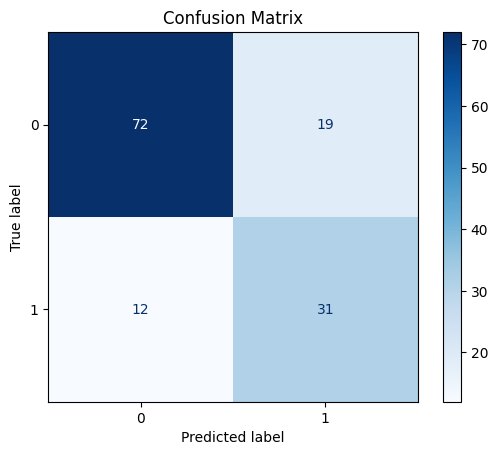

In [69]:
plot_confusion_matrix(y_test, y_pred)

In [70]:
accuracy, sensitivity, gini = get_confusion_matrix_insights(y_test, y_pred)
model_results['DT_PRE'] = {'accuracy': accuracy, 'sensitivity': sensitivity, 'gini': gini}

Accuratezza: 0.77
Sensitività (Recall): 0.72
False Positive Rate (FPR): 0.21
Specificità (TNR): 0.79
Precisione: 0.62
Gini coefficient: 0.51


### Post Pruning

In [71]:
# Model with post-pruning
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas


In [72]:
best_model = None
best_score = 0
for ccp_alpha in ccp_alphas:
    model_temp = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(model_temp, X_train, y_train, cv=5)
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_model = model_temp


print(f'Best cross-validated accuracy on TRAIN: {best_score:.2f}')

Best cross-validated accuracy on TRAIN: 0.85


In [73]:
# Cross validation with cross validation setted to 5
scores = cross_val_score(model, x, y, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Mean accuracy: {scores.mean():.2f}')

Cross-validation scores: [0.79850746 0.7761194  0.7761194  0.80597015 0.90298507]
Mean accuracy: 0.81


### Selected model : Decision Tree with cost complexity pruning (after pruning)

In [74]:
# Best model training
best_model.fit(X_train, y_train)


# test evaluation
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Accuracy on test set: {accuracy_best:.2f}')

Accuracy on test set: 0.81


<Figure size 800x600 with 0 Axes>

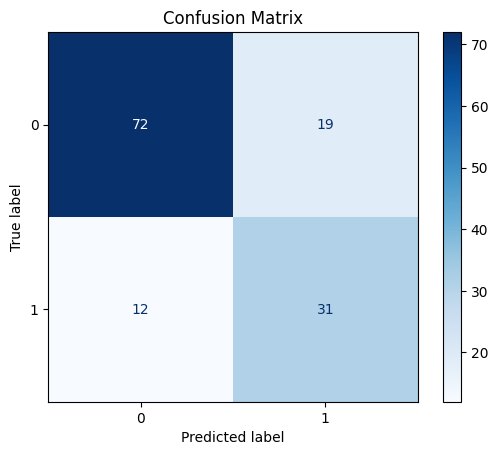

In [75]:
plot_confusion_matrix(y_test, y_pred)

In [76]:
accuracy, sensitivity, gini = get_confusion_matrix_insights(y_test, y_pred)
model_results['DT_CCP'] = {'accuracy': accuracy, 'sensitivity': sensitivity, 'gini': gini}

Accuratezza: 0.77
Sensitività (Recall): 0.72
False Positive Rate (FPR): 0.21
Specificità (TNR): 0.79
Precisione: 0.62
Gini coefficient: 0.51


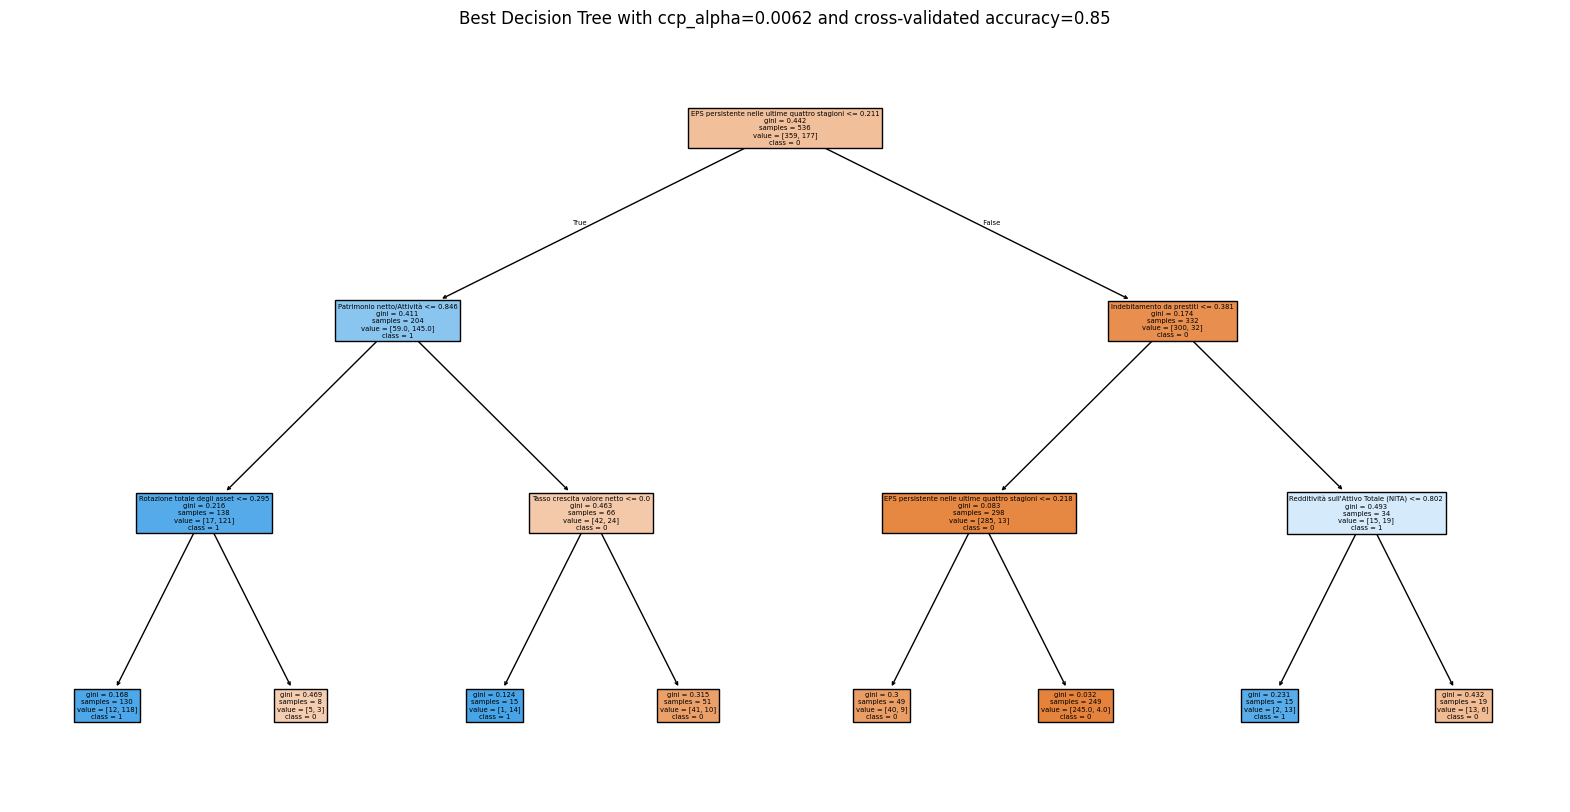

In [77]:
# Best model visualization
plt.figure(figsize=(20, 10))
plot_tree(model_pre_pruned, feature_names=list(X_train.columns), class_names=["0","1"], filled=True)
plt.title(f'Best Decision Tree with ccp_alpha={best_model.ccp_alpha:.4f} and cross-validated accuracy={best_score:.2f}')
plt.show()

# Random Forest

### Sperimental model

In [78]:
# Select the model
rf_classifier = rfc(n_estimators=600, min_samples_leaf=0.12, random_state=42)

# Fit rf to the training set    
rf_classifier.fit(X_train, y_train) 

# Predict the test set labels
y_pred = rf_classifier.predict(X_test)

# Evaluate the test set RMSE
accuracy = accuracy_score(y_test, y_pred)

# Print rmse_test
print('Test set Accuracy of rf: {:.2f}'.format(accuracy))

Test set Accuracy of rf: 0.82


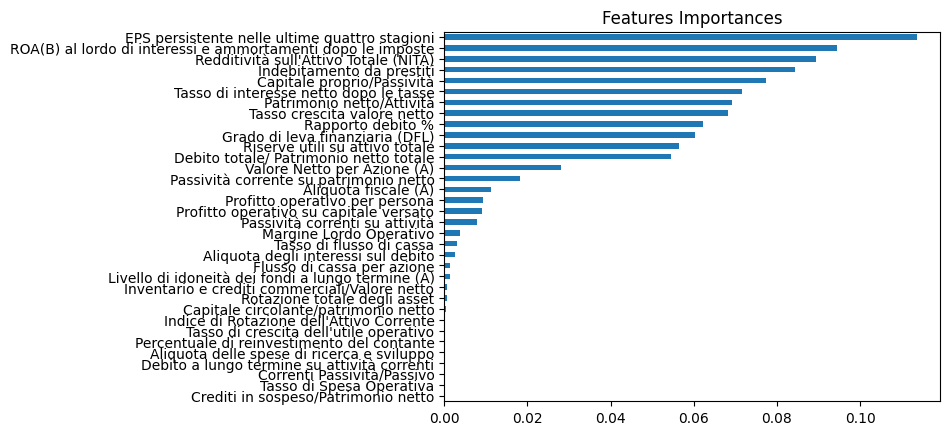

In [79]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf_classifier.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='tab:blue')
plt.title('Features Importances')
plt.show()

In [80]:
# The hyperparameters
rf_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 0.12,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 600,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [81]:
# Define the dictionary 'params_rf'
params_rf = {
            'n_estimators' : [100,350,500],
            'max_features' : ['log2','auto','sqrt'],
            'min_samples_leaf' : [2,10,30]            
}

In [82]:
rf_classifier = rfc()

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf_classifier,
                       param_grid=params_rf,
                       scoring='accuracy',
                       cv=3,
                       # verbose=1,
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ['log2', 'auto', 'sqrt'],
                         'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [100, 350, 500]},
             scoring='accuracy')

### Selected model

In [83]:
# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print rmse_test
print('Test Accuracy of best model: {:.3f}'.format(accuracy)) 

Test Accuracy of best model: 0.821


<Figure size 800x600 with 0 Axes>

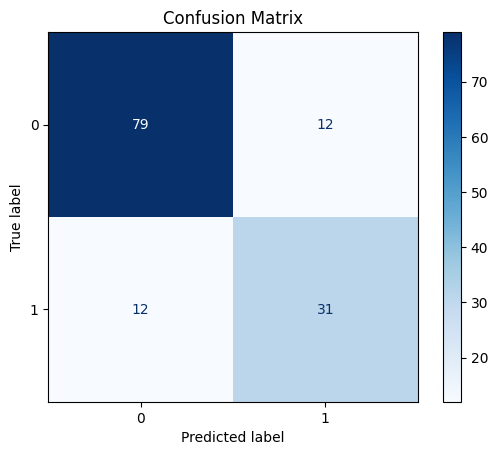

In [84]:
plot_confusion_matrix(y_test, y_pred)

In [85]:
accuracy, sensitivity, gini = get_confusion_matrix_insights(y_test, y_pred)
model_results['RF'] = {'accuracy': accuracy, 'sensitivity': sensitivity, 'gini': gini}

Accuratezza: 0.82
Sensitività (Recall): 0.72
False Positive Rate (FPR): 0.13
Specificità (TNR): 0.87
Precisione: 0.72
Gini coefficient: 0.59


# Rete neurale

In [86]:
import random
seed = 1123
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)


# Dividi i dati in set di addestramento e test
X_train_ann, X_val_ann, y_train_ann, y_val_ann = train_test_split(X_train, y_train, test_size=0.2, random_state=seed, stratify=y_train)
#X_test = X_test[X_train_SMOTE.columns]
# Modifica la forma del target
y_train_ann = to_categorical(y_train_ann)
y_val_ann = to_categorical(y_val_ann)
y_test_ann = to_categorical(y_test)

# Standardizza le caratteristiche
scaler = StandardScaler()
X_train_ann = scaler.fit_transform(X_train_ann)
X_val_ann = scaler.transform(X_val_ann)
X_test_ann = scaler.transform(X_test)

# Crea la rete neurale
model = Sequential()
model.add(Dense(16, input_dim=X_train_ann.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Dropout del 50%
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))  # Dropout del 50%
#model.add(Dense(8, activation='relu'))
#model.add(Dropout(0.5))  # Dropout del 50%
model.add(Dense(y_train_ann.shape[1], activation='sigmoid'))

# Compila il modello
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Definisci il callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# Addestra il modello
history = model.fit(X_train_ann, y_train_ann, epochs=200, batch_size=10, validation_data=(X_val_ann, y_val_ann), callbacks=[early_stopping])

# Valuta il modello
loss, accuracy = model.evaluate(X_test_ann, y_test_ann)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6602 - loss: 0.9727 - val_accuracy: 0.7130 - val_loss: 0.6079
Epoch 2/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6577 - loss: 0.7710 - val_accuracy: 0.7870 - val_loss: 0.5531
Epoch 3/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6825 - loss: 0.7692 - val_accuracy: 0.7870 - val_loss: 0.5188
Epoch 4/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6811 - loss: 0.6161 - val_accuracy: 0.8333 - val_loss: 0.4882
Epoch 5/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6818 - loss: 0.6325 - val_accuracy: 0.8333 - val_loss: 0.4705
Epoch 6/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7095 - loss: 0.6410 - val_accuracy: 0.8333 - val_loss: 0.4596
Epoch 7/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7422 - loss: 0.5069 - val_accuracy: 0.8333 - val_loss: 0.4487
Epoch 8/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7102 - loss: 0.5638 - val_accuracy: 0.8519 - v

In [87]:
y_pred = model.predict(X_test_ann)
y_pred = (y_pred > 0.5).astype(int)
y_pred_labels = np.argmax(y_pred, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


<Figure size 800x600 with 0 Axes>

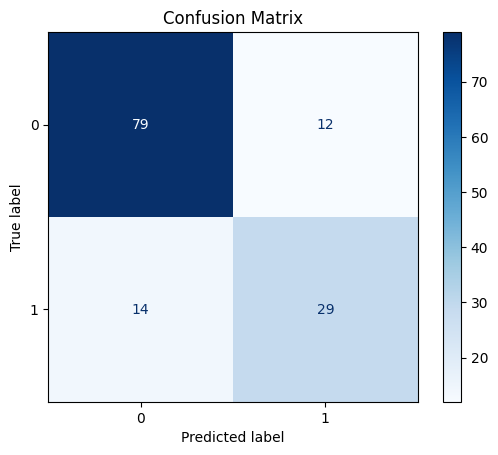

In [88]:
plot_confusion_matrix(y_test, y_pred_labels)

In [89]:
accuracy, sensitivity, gini = get_confusion_matrix_insights(y_test, y_pred_labels)
model_results['ANN'] = {'accuracy': accuracy, 'sensitivity': sensitivity, 'gini': gini}

Accuratezza: 0.81
Sensitività (Recall): 0.67
False Positive Rate (FPR): 0.13
Specificità (TNR): 0.87
Precisione: 0.71
Gini coefficient: 0.54


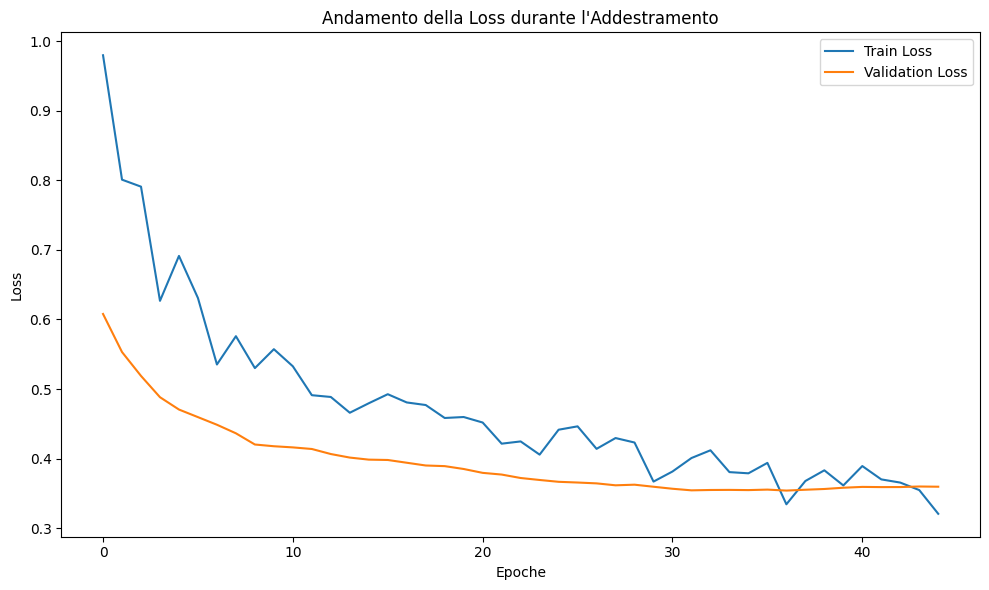

In [90]:
# Plot della perdita durante l'addestramento
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoche')
plt.ylabel('Loss')
plt.title('Andamento della Loss durante l\'Addestramento')
plt.legend()

plt.tight_layout()
plt.show()

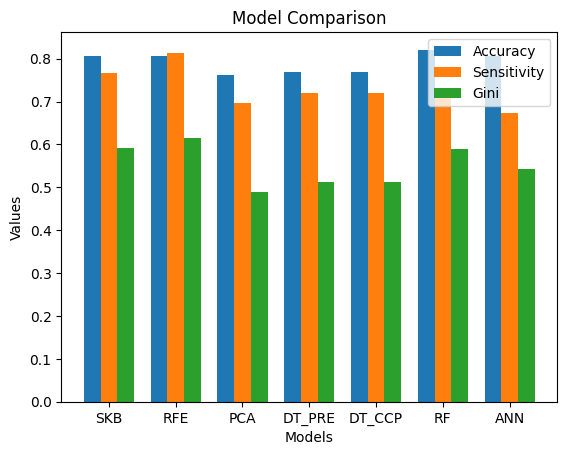

In [91]:
# Extracting data for plotting
models = list(model_results.keys())
accuracy = [model_results[model]['accuracy'] for model in models]
sensitivity = [model_results[model]['sensitivity'] for model in models]
gini = [model_results[model]['gini'] for model in models]

# Plotting the data
x = range(len(models))
width = 0.25

fig, ax = plt.subplots()

# Plotting each bar group
ax.bar(x, accuracy, width, label='Accuracy', color='tab:blue', align='center')
ax.bar([p + width for p in x], sensitivity, width, label='Sensitivity', color='tab:orange', align='center')
ax.bar([p + width*2 for p in x], gini, width, label='Gini', color='tab:green', align='center')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Values')
ax.set_title('Model Comparison')
ax.set_xticks([p + width for p in x])
ax.set_xticklabels(models)
ax.legend()

plt.show()